In [51]:
import pandas as pd
from datetime import datetime, date
import csv

In [52]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [53]:
data_a = pd.read_excel(r'2014_TU_EV_STU_AUG.xlsx')
df_a = pd.DataFrame(data_a)
df_a = df_a.sort_values(by=['Uhrzeit'])

data_u = pd.read_excel(r'2014_TU_EV_STU_ULM.xlsx')
df_u = pd.DataFrame(data_u)
df_u = df_u.sort_values(by=['Uhrzeit'])

detected_cars = {"License": ["Last Read", "Cam", "Duration"]}

df_merged = df_a.merge(df_u, how='outer')

df_merged = df_merged[df_merged.duplicated(['Nummernschild'], keep='first')].merge(df_merged[df_merged.duplicated(['Nummernschild'], keep='last')], how='outer')

print("Total data count 2014: ", str(len(df_merged)))
detected_cars = {"License": ["First Read", "Last Read", "Cam1", "Cam2", "Duration"]}

grouped = df_merged.groupby('Nummernschild') 
for name, group in grouped:
    detected_cars[name] = [group['Uhrzeit'].iloc[0], group['Uhrzeit'].iloc[-1], group['Messtelle'].iloc[0], group['Messtelle'].iloc[-1], datetime.combine(date.today(), group['Uhrzeit'].iloc[0]) - datetime.combine(date.today(), group['Uhrzeit'].iloc[-1])]
    print(group)
    #print(detected_cars[name])


Total data count 2014:  4946
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
629    156162  00109da93e04f79f2865b0c135fe6694   -        NaN 2014-07-22   
3094     5151  00109da93e04f79f2865b0c135fe6694   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
629   17:25:08     1045,08      17      25        8    TUM-10           STU   
3094  16:47:06     1007,06      16      47        6    TUM-01           STU   

      Kommentar  
629         NaN  
3094        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
937    156463  00258e26d6e29b24ec75e85c1dce1991   -        NaN 2014-07-22   
3479     5781  00258e26d6e29b24ec75e85c1dce1991   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
937   17:53:36     1073,36      17      53       36    TUM-10           STU   
3479  17:17:57     1037,57      17      17       57    TU

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1496   156992  036f367c2e70db805f9deefafef14c7b   -        NaN 2014-07-22   
4044    28804  036f367c2e70db805f9deefafef14c7b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1496  18:46:09     1126,09      18      46        9    TUM-10           STU   
4044  18:14:58     1094,58      18      14       58    TUM-03           STU   

      Kommentar  
1496        NaN  
4044        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
573    136797  038b1f2e3635d6cc0dae647b67a125b7   -        NaN 2014-07-22   
3017     5008  038b1f2e3635d6cc0dae647b67a125b7   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
573   17:21:13     1041,13      17      21       13    TUM-09           STU   
3017  16:39:34      999,34      16      39       34    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2432   157643  0582522d5e00c84aa5fba62e6b086d26   -        NaN 2014-07-22   
4919    30037  0582522d5e00c84aa5fba62e6b086d26   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2432  19:56:35     1196,35      19      56       35    TUM-10           STU   
4919  19:23:57     1163,57      19      23       57    TUM-03           STU   

      Kommentar  
2432        NaN  
4919        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
965    156485  059318a58f7cf520d15b9ba937d08665   -        NaN 2014-07-22   
3516    27739  059318a58f7cf520d15b9ba937d08665   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
965   17:55:32     1075,32      17      55       32    TUM-10           STU   
3516  17:20:41     1040,41      17      20       41    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
486    156000  07e9eabe8305b3f9052ad26d68189f53   -        NaN 2014-07-22   
2997    26711  07e9eabe8305b3f9052ad26d68189f53   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
486   17:11:17     1031,17      17      11       17    TUM-10           STU   
2997  16:37:31      997,31      16      37       31    TUM-03           STU   

      Kommentar  
486         NaN  
2997        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
354    136467  07f84243584481450935f2fa5943c039   -        NaN 2014-07-22   
2767     4606  07f84243584481450935f2fa5943c039   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
354   16:57:40     1017,40      16      57       40    TUM-09           STU   
2767  16:15:35      975,35      16      15       35    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1715   157157  0b5fa6f223392723163cb33024630587   -        NaN 2014-07-22   
4239     7058  0b5fa6f223392723163cb33024630587   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1715  19:03:17     1143,17      19       3       17    TUM-10           STU   
4239  18:30:50     1110,50      18      30       50    TUM-01           STU   

      Kommentar  
1715        NaN  
4239        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1815   157229  0bb1a21a706fe2d764902aa3e71383a0   -        NaN 2014-07-22   
4359    29264  0bb1a21a706fe2d764902aa3e71383a0   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1815  19:10:51     1150,51      19      10       51    TUM-10           STU   
4359  18:38:31     1118,31      18      38       31    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1190   156696  0f8351821331d9a08e38d1659b025caa   -        NaN 2014-07-22   
3695    28136  0f8351821331d9a08e38d1659b025caa   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1190  18:17:12     1097,12      18      17       12    TUM-10           STU   
3695  17:41:47     1061,47      17      41       47    TUM-03           STU   

      Kommentar  
1190        NaN  
3695        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
945    156471  0f89436408eb2118d8d338de49c780cf   -        NaN 2014-07-22   
3482    27675  0f89436408eb2118d8d338de49c780cf   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
945   17:54:01     1074,01      17      54        1    TUM-10           STU   
3482  17:18:09     1038,09      17      18        9    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
727    136987  15b34ee7c89288cb84163d5f64c18b55   -        NaN 2014-07-22   
3247    27234  15b34ee7c89288cb84163d5f64c18b55   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
727   17:33:58     1053,58      17      33       58    TUM-09           STU   
3247  16:59:31     1019,31      16      59       31    TUM-03           STU   

      Kommentar  
727         NaN  
3247        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1865   157270  15d126c84d6d6000e9eb2319b451aea4   -        NaN 2014-07-22   
4064     6815  15d126c84d6d6000e9eb2319b451aea4   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1865  19:14:38     1154,38      19      14       38    TUM-10           STU   
4064  18:17:10     1097,10      18      17       10    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2226   138587  18ec237885a2945df7bc3433d8229379   -        NaN 2014-07-22   
4802    29885  18ec237885a2945df7bc3433d8229379   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2226  19:40:59     1180,59      19      40       59    TUM-09           STU   
4802  19:12:35     1152,35      19      12       35    TUM-03           STU   

      Kommentar  
2226        NaN  
4802        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1872   138257  18ff3fcc27bc0049dfb357d3e7d2943f   -        NaN 2014-07-22   
4346    29248  18ff3fcc27bc0049dfb357d3e7d2943f   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1872  19:14:57     1154,57      19      14       57    TUM-09           STU   
4346  18:37:34     1117,34      18      37       34    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1169   156665  1d416aed0ce3fcc8e11d3a8820f35d27   -        NaN 2014-07-22   
3653    28011  1d416aed0ce3fcc8e11d3a8820f35d27   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1169  18:14:02     1094,02      18      14        2    TUM-10           STU   
3653  17:34:29     1054,29      17      34       29    TUM-03           STU   

      Kommentar  
1169        NaN  
3653        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
444    155952  1d43e3d14c91823b2b2e170d4b0bfe26   -        NaN 2014-07-22   
2968     4916  1d43e3d14c91823b2b2e170d4b0bfe26   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
444   17:06:37     1026,37      17       6       37    TUM-10           STU   
2968  16:33:19      993,19      16      33       19    TUM-01           STU   

      

      Sort_ID                     Nummernschild         Ort        Ortszusatz  \
2041   138416  2164b9df8e9fae0dbe5a7167e518f67f  Österreich  Niederösterreich   
4528    29514  2164b9df8e9fae0dbe5a7167e518f67f  Österreich  Niederösterreich   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
2041 2014-07-22  19:27:08     1167,08      19      27        8    TUM-09   
4528 2014-07-22  18:52:05     1132,05      18      52        5    TUM-03   

     Fahrtrichtung  Kommentar  
2041           STU        NaN  
4528           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
651    156188  2165af787e8de3d7044593647309366c   -        NaN 2014-07-22   
3210    27170  2165af787e8de3d7044593647309366c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
651   17:27:23     1047,23      17      27       23    TUM-10           STU   
3210  16:56:18     1016,18      16      5

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
567    136790  24c455bfb4372a454330092f60f8c488   -        NaN 2014-07-22   
3005     4986  24c455bfb4372a454330092f60f8c488   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
567   17:20:37     1040,37      17      20       37    TUM-09           STU   
3005  16:38:12      998,12      16      38       12    TUM-01           STU   

      Kommentar  
567         NaN  
3005        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
952    137251  24e3896115cacb60a2181cd34705feb6   -        NaN 2014-07-22   
3380     5623  24e3896115cacb60a2181cd34705feb6   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
952   17:54:36     1074,36      17      54       36    TUM-09           STU   
3380  17:09:34     1029,34      17       9       34    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1517   137930  28d63981b656dbcf1de3e0a9f15a9333   -        NaN 2014-07-22   
4008     6725  28d63981b656dbcf1de3e0a9f15a9333   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1517  18:48:18     1128,18      18      48       18    TUM-09           STU   
4008  18:12:01     1092,01      18      12        1    TUM-01           STU   

      Kommentar  
1517        NaN  
4008        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1118   137440  28ef6de4189d1a42ff68d3d28325ec71   -        NaN 2014-07-22   
3573     5964  28ef6de4189d1a42ff68d3d28325ec71   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1118  18:08:51     1088,51      18       8       51    TUM-09           STU   
3573  17:25:54     1045,54      17      25       54    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1415   156918  2c1274a591aaa6df4d1c9605b77083a0   -        NaN 2014-07-22   
3928    28605  2c1274a591aaa6df4d1c9605b77083a0   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1415  18:38:30     1118,30      18      38       30    TUM-10           STU   
3928  18:04:46     1084,46      18       4       46    TUM-03           STU   

      Kommentar  
1415        NaN  
3928        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
744    137006  2c30442c35e0ad690632dc411e90841a   -        NaN 2014-07-22   
3288     5485  2c30442c35e0ad690632dc411e90841a   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
744   17:35:18     1055,18      17      35       18    TUM-09           STU   
3288  17:03:06     1023,06      17       3        6    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
93     155639  2f3eafdefb2368786836d448946358de   -        NaN 2014-07-22   
2564     4308  2f3eafdefb2368786836d448946358de   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
93    16:37:45      997,45      16      37       45    TUM-10           STU   
2564  15:59:37      959,37      15      59       37    TUM-01           STU   

      Kommentar  
93          NaN  
2564        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
30     155557  2f5093c5515697cd367384906471cc8c   -        NaN 2014-07-22   
2484    25835  2f5093c5515697cd367384906471cc8c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
30    16:31:01      991,01      16      31        1    TUM-10           STU   
2484  15:52:22      952,22      15      52       22    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1694   157140  32be99a73b8940e7445518ccd4654a14   -        NaN 2014-07-22   
4125    28951  32be99a73b8940e7445518ccd4654a14   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1694  19:01:47     1141,47      19       1       47    TUM-10           STU   
4125  18:21:29     1101,29      18      21       29    TUM-03           STU   

      Kommentar  
1694        NaN  
4125        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1581   157051  32ce0ee471cf780e49f39dcf3202c3c2   -        NaN 2014-07-22   
4119    28945  32ce0ee471cf780e49f39dcf3202c3c2   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1581  18:53:08     1133,08      18      53        8    TUM-10           STU   
4119  18:21:21     1101,21      18      21       21    TUM-03           STU   

      

2679        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1982   157345  35a5d09cd179d24833bc8224b01db350   -        NaN 2014-07-22   
4480     7333  35a5d09cd179d24833bc8224b01db350   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1982  19:22:53     1162,53      19      22       53    TUM-10           STU   
4480  18:48:05     1128,05      18      48        5    TUM-01           STU   

      Kommentar  
1982        NaN  
4480        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1179   156679  35b0a5972206126c60721bfdcc9f1cad   -        NaN 2014-07-22   
3662    28039  35b0a5972206126c60721bfdcc9f1cad   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1179  18:15:26     1095,26      18      15       26    TUM-10           STU   
3662  17:35:39     1055,39      17      35       39    TUM-03       

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1554   137962  381964f7c9b08d27374b4c625bfdd9fa   -        NaN 2014-07-22   
3989     6684  381964f7c9b08d27374b4c625bfdd9fa   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1554  18:50:58     1130,58      18      50       58    TUM-09           STU   
3989  18:09:45     1089,45      18       9       45    TUM-01           STU   

      Kommentar  
1554        NaN  
3989        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
502    156020  3825411fed6554f14a8a56a375bc583f   -        NaN 2014-07-22   
3019    26759  3825411fed6554f14a8a56a375bc583f   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
502   17:13:06     1033,06      17      13        6    TUM-10           STU   
3019  16:39:38      999,38      16      39       38    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
898    156418  3b69eb8f3b7fd2bdf5ab8d06cbd2b49a   -        NaN 2014-07-22   
3348    27420  3b69eb8f3b7fd2bdf5ab8d06cbd2b49a   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
898   17:50:50     1070,50      17      50       50    TUM-10           STU   
3348  17:07:15     1027,15      17       7       15    TUM-03           STU   

      Kommentar  
898         NaN  
3348        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1479   156975  3b6c2663a2e72bb3a1da06a18dad7616   -        NaN 2014-07-22   
4015    28755  3b6c2663a2e72bb3a1da06a18dad7616   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1479  18:44:10     1124,10      18      44       10    TUM-10           STU   
4015  18:13:02     1093,02      18      13        2    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
56     136104  3e88f7ce7d6f9b4cac18903e5f4f7cbb   -        NaN 2014-07-22   
2546     4273  3e88f7ce7d6f9b4cac18903e5f4f7cbb   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
56    16:34:23      994,23      16      34       23    TUM-09           STU   
2546  15:57:33      957,33      15      57       33    TUM-01           STU   

      Kommentar  
56          NaN  
2546        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2322   138671  3ea34562c2c01127c7632069a66c633b   -        NaN 2014-07-22   
4743     7656  3ea34562c2c01127c7632069a66c633b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2322  19:47:27     1187,27      19      47       27    TUM-09           STU   
4743  19:08:22     1148,22      19       8       22    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
402    136530  41c0ff844f7aefc49edd8dff54857372   -        NaN 2014-07-22   
2826     4678  41c0ff844f7aefc49edd8dff54857372   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
402   17:02:21     1022,21      17       2       21    TUM-09           STU   
2826  16:19:57      979,57      16      19       57    TUM-01           STU   

      Kommentar  
402         NaN  
2826        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
682    136935  41d260cc9bd3d2f28f3d15b5a61dc08e   -        NaN 2014-07-22   
3229     5367  41d260cc9bd3d2f28f3d15b5a61dc08e   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
682   17:30:05     1050,05      17      30        5    TUM-09           STU   
3229  16:57:43     1017,43      16      57       43    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1787   138178  448134609c7c432e4e8548643a523b3f   -        NaN 2014-07-22   
4248    29131  448134609c7c432e4e8548643a523b3f   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1787  19:08:16     1148,16      19       8       16    TUM-09           STU   
4248  18:31:36     1111,36      18      31       36    TUM-03           STU   

      Kommentar  
1787        NaN  
4248        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
203    136299  44b52897a82f6346677581b66b342515   -        NaN 2014-07-22   
2595     4354  44b52897a82f6346677581b66b342515   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
203   16:45:49     1005,49      16      45       49    TUM-09           STU   
2595  16:02:03      962,03      16       2        3    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1964   138340  4795befb04c1f1302c4eb2b37956a241   -        NaN 2014-07-22   
4473     7314  4795befb04c1f1302c4eb2b37956a241   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1964  19:21:06     1161,06      19      21        6    TUM-09           STU   
4473  18:46:50     1126,50      18      46       50    TUM-01           STU   

      Kommentar  
1964        NaN  
4473        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2232   138597  47b5e95b71dcdfa2f7cdb9f677187100   -        NaN 2014-07-22   
4709    29770  47b5e95b71dcdfa2f7cdb9f677187100   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2232  19:41:37     1181,37      19      41       37    TUM-09           STU   
4709  19:05:19     1145,19      19       5       19    TUM-03           STU   

      

      Sort_ID                     Nummernschild         Ort        Ortszusatz  \
2265   138626  4a67f9b4950817be1cb6ec1d95cd8f36  Österreich  Niederösterreich   
4684     7576  4a67f9b4950817be1cb6ec1d95cd8f36  Österreich  Niederösterreich   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
2265 2014-07-22  19:43:48     1183,48      19      43       48    TUM-09   
4684 2014-07-22  19:02:57     1142,57      19       2       57    TUM-01   

     Fahrtrichtung  Kommentar  
2265           STU        NaN  
4684           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2338   157589  4a6f7297229e93ca74aa1c94da01a97f   -        NaN 2014-07-22   
4848    29943  4a6f7297229e93ca74aa1c94da01a97f   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2338  19:49:07     1189,07      19      49        7    TUM-10           STU   
4848  19:16:23     1156,23      19      1

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
901    156420  4d9961a260d5cbba25c8f9baa8a2b987   -        NaN 2014-07-22   
3454    27622  4d9961a260d5cbba25c8f9baa8a2b987   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
901   17:50:56     1070,56      17      50       56    TUM-10           STU   
3454  17:15:28     1035,28      17      15       28    TUM-03           STU   

      Kommentar  
901         NaN  
3454        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1218   137620  4da038c4fe4dd0cd2d8553fbfe27dbaf   -        NaN 2014-07-22   
3679     6146  4da038c4fe4dd0cd2d8553fbfe27dbaf   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1218  18:22:18     1102,18      18      22       18    TUM-09           STU   
3679  17:39:28     1059,28      17      39       28    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
955    137257  50dac90fdd93ef69b8ae178c56841ac2   -        NaN 2014-07-22   
3444     5719  50dac90fdd93ef69b8ae178c56841ac2   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
955   17:54:48     1074,48      17      54       48    TUM-09           STU   
3444  17:14:31     1034,31      17      14       31    TUM-01           STU   

      Kommentar  
955         NaN  
3444        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2213   138573  50e806c13564a2eea1671aca0758c9fa   -        NaN 2014-07-22   
4596     7462  50e806c13564a2eea1671aca0758c9fa   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2213  19:39:59     1179,59      19      39       59    TUM-09           STU   
4596  18:56:03     1136,03      18      56        3    TUM-01           STU   

      

      Sort_ID                     Nummernschild         Ort Ortszusatz  \
66     155607  54f86be5fe74ff174effeb8e80ca88e9  Österreich        NaN   
2568    25956  54f86be5fe74ff174effeb8e80ca88e9  Österreich        NaN   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
66   2014-07-22  16:35:29      995,29      16      35       29    TUM-10   
2568 2014-07-22  16:00:04      960,04      16       0        4    TUM-03   

     Fahrtrichtung  Kommentar  
66             STU        NaN  
2568           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
336    136447  54f9706a534b176fecbdec9eeab7688e   -        NaN 2014-07-22   
2822    26361  54f9706a534b176fecbdec9eeab7688e   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
336   16:56:13     1016,13      16      56       13    TUM-09           STU   
2822  16:19:47      979,47      16      19       47    TUM-03 

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
152    155694  57ff05d83dc7ee84c5e9616a87670efc   -        NaN 2014-07-22   
2644    26074  57ff05d83dc7ee84c5e9616a87670efc   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
152   16:42:07     1002,07      16      42        7    TUM-10           STU   
2644  16:06:29      966,29      16       6       29    TUM-03           STU   

      Kommentar  
152         NaN  
2644        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
625    156157  5810cf9b9e83685d9d1c49089d9512a7   -        NaN 2014-07-22   
3066     5113  5810cf9b9e83685d9d1c49089d9512a7   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
625   17:24:49     1044,49      17      24       49    TUM-10           STU   
3066  16:45:18     1005,18      16      45       18    TUM-01           STU   

      

3467        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2341   138695  5ccc397b1f87a3e864102711f0af25ea   -        NaN 2014-07-22   
4796     7721  5ccc397b1f87a3e864102711f0af25ea   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2341  19:49:35     1189,35      19      49       35    TUM-09           STU   
4796  19:12:04     1152,04      19      12        4    TUM-01           STU   

      Kommentar  
2341        NaN  
4796        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1149   156642  5cd829e8b98cba6bc4a87b4cafe25bc9   -        NaN 2014-07-22   
3669    28066  5cd829e8b98cba6bc4a87b4cafe25bc9   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1149  18:12:12     1092,12      18      12       12    TUM-10           STU   
3669  17:37:49     1057,49      17      37       49    TUM-03       

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1541   157022  60d51217f501b880103c1e05216b2203   -        NaN 2014-07-22   
3800     6383  60d51217f501b880103c1e05216b2203   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1541  18:49:55     1129,55      18      49       55    TUM-10           STU   
3800  17:54:33     1074,33      17      54       33    TUM-01           STU   

      Kommentar  
1541        NaN  
3800        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1580   137987  60d8da6286d00b708daeefdec4ad7ae2   -        NaN 2014-07-22   
4014     6743  60d8da6286d00b708daeefdec4ad7ae2   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1580  18:53:08     1133,08      18      53        8    TUM-09           STU   
4014  18:12:56     1092,56      18      12       56    TUM-01           STU   

      

      Sort_ID                     Nummernschild         Ort      Ortszusatz  \
102    136171  64c295c70549a2058d6c33bee292c5a6  Österreich  Oberösterreich   
2486     4181  64c295c70549a2058d6c33bee292c5a6  Österreich  Oberösterreich   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
102  2014-07-22  16:38:36      998,36      16      38       36    TUM-09   
2486 2014-07-22  15:52:35      952,35      15      52       35    TUM-01   

     Fahrtrichtung  Kommentar  
102            STU        NaN  
2486           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
116    136187  64d8acbf213b9354611acc1f2857500d   -        NaN 2014-07-22   
2602     4363  64d8acbf213b9354611acc1f2857500d   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
116   16:39:34      999,34      16      39       34    TUM-09           STU   
2602  16:02:28      962,28      16       2     

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2235   157518  67f986176b137fc70042f9af702c36ab   -        NaN 2014-07-22   
4735    29807  67f986176b137fc70042f9af702c36ab   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2235  19:41:51     1181,51      19      41       51    TUM-10           STU   
4735  19:07:42     1147,42      19       7       42    TUM-03           STU   

      Kommentar  
2235        NaN  
4735        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
737    156271  68222cb48618782758232ee3dc8e3806   -        NaN 2014-07-22   
3268    27266  68222cb48618782758232ee3dc8e3806   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
737   17:34:58     1054,58      17      34       58    TUM-10           STU   
3268  17:01:02     1021,02      17       1        2    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1790   138180  6bea14a1147312aee5a03368aae3a7f5   -        NaN 2014-07-22   
4308    29199  6bea14a1147312aee5a03368aae3a7f5   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1790  19:08:29     1148,29      19       8       29    TUM-09           STU   
4308  18:34:21     1114,21      18      34       21    TUM-03           STU   

      Kommentar  
1790        NaN  
4308        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
16       7831  6beabba6e71739b9fc15d25504411290   -        NaN 2014-07-22   
3576     5968  6beabba6e71739b9fc15d25504411290   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
16    19:20:20     1160,20      19      20       20    TUM-01           STU   
3576  17:26:06     1046,06      17      26        6    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2360   138713  6febb5d3a082f1a133a5f9f2c318de15   -        NaN 2014-07-22   
4818    29909  6febb5d3a082f1a133a5f9f2c318de15   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2360  19:50:57     1190,57      19      50       57    TUM-09           STU   
4818  19:14:59     1154,59      19      14       59    TUM-03           STU   

      Kommentar  
2360        NaN  
4818        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2187   157485  6ff29044a55aca5c73c70a9ace24f51a   -        NaN 2014-07-22   
4730    29804  6ff29044a55aca5c73c70a9ace24f51a   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2187  19:37:29     1177,29      19      37       29    TUM-10           STU   
4730  19:06:57     1146,57      19       6       57    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1229   156750  723f96e2635da994a12e860e1f734758   -        NaN 2014-07-22   
3718    28202  723f96e2635da994a12e860e1f734758   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1229  18:23:15     1103,15      18      23       15    TUM-10           STU   
3718  17:45:39     1065,39      17      45       39    TUM-03           STU   

      Kommentar  
1229        NaN  
3718        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2072   138438  7282f5bef2693ca2dca17a79c2ef6de9   -        NaN 2014-07-22   
4610    29622  7282f5bef2693ca2dca17a79c2ef6de9   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2072  19:29:18     1169,18      19      29       18    TUM-09           STU   
4610  18:57:03     1137,03      18      57        3    TUM-03           STU   

      

      Sort_ID                     Nummernschild         Ort Ortszusatz  \
1213   137609  750c1e91be6c6b37bfd9282c4cfbe8e8  Österreich        NaN   
3323     5535  750c1e91be6c6b37bfd9282c4cfbe8e8  Österreich        NaN   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
1213 2014-07-22  18:21:21     1101,21      18      21       21    TUM-09   
3323 2014-07-22  17:05:28     1025,28      17       5       28    TUM-01   

     Fahrtrichtung  Kommentar  
1213           STU        NaN  
3323           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1584   137990  75392715ce1c6534f486a64d7a3b97b3   -        NaN 2014-07-22   
4108    28912  75392715ce1c6534f486a64d7a3b97b3   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1584  18:53:19     1133,19      18      53       19    TUM-09           STU   
4108  18:20:10     1100,10      18      20       10    TUM-03 

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1792   138183  78762b6234eaf314adc28810a5e5396d   -        NaN 2014-07-22   
4297     7099  78762b6234eaf314adc28810a5e5396d   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1792  19:08:51     1148,51      19       8       51    TUM-09           STU   
4297  18:33:55     1113,55      18      33       55    TUM-01           STU   

      Kommentar  
1792        NaN  
4297        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1484   137891  78ccd2ea240db336a1e83a88c0ebde22   -        NaN 2014-07-22   
3977    28683  78ccd2ea240db336a1e83a88c0ebde22   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1484  18:44:53     1124,53      18      44       53    TUM-09           STU   
3977  18:09:06     1089,06      18       9        6    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2006   138382  7b2e815b2ac94292ef47f550ed86a347   -        NaN 2014-07-22   
4416     7258  7b2e815b2ac94292ef47f550ed86a347   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2006  19:24:57     1164,57      19      24       57    TUM-09           STU   
4416  18:43:43     1123,43      18      43       43    TUM-01           STU   

      Kommentar  
2006        NaN  
4416        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1592   157060  7b4e1fa93494cb4b87803aa25cf60144   -        NaN 2014-07-22   
3909    28580  7b4e1fa93494cb4b87803aa25cf60144   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1592  18:53:51     1133,51      18      53       51    TUM-10           STU   
3909  18:03:42     1083,42      18       3       42    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1290   137698  7df456345e0814af718f22b321afcb00   -        NaN 2014-07-22   
3780     6349  7df456345e0814af718f22b321afcb00   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1290  18:28:30     1108,30      18      28       30    TUM-09           STU   
3780  17:52:42     1072,42      17      52       42    TUM-01           STU   

      Kommentar  
1290        NaN  
3780        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2303   138657  7e3c76c60ae7d90d8d12b841e0dd41db   -        NaN 2014-07-22   
4700     7596  7e3c76c60ae7d90d8d12b841e0dd41db   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2303  19:46:40     1186,40      19      46       40    TUM-09           STU   
4700  19:04:23     1144,23      19       4       23    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1173   137526  8110a7b26aeebd77bbe2bf63aa242e20   -        NaN 2014-07-22   
3689    28118  8110a7b26aeebd77bbe2bf63aa242e20   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1173  18:14:35     1094,35      18      14       35    TUM-09           STU   
3689  17:40:47     1060,47      17      40       47    TUM-03           STU   

      Kommentar  
1173        NaN  
3689        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1211   156730  811545cb90f87230701de1217a7a3682   -        NaN 2014-07-22   
3737    28248  811545cb90f87230701de1217a7a3682   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1211  18:21:10     1101,10      18      21       10    TUM-10           STU   
3737  17:48:25     1068,25      17      48       25    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1713   157156  842cfa2955d016d022bd8074af7b7bda   -        NaN 2014-07-22   
4212     7035  842cfa2955d016d022bd8074af7b7bda   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1713  19:03:13     1143,13      19       3       13    TUM-10           STU   
4212  18:29:28     1109,28      18      29       28    TUM-01           STU   

      Kommentar  
1713        NaN  
4212        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2363   157603  8448a1746e739c9942f5bc669358038b   -        NaN 2014-07-22   
4867    29966  8448a1746e739c9942f5bc669358038b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2363  19:51:18     1191,18      19      51       18    TUM-10           STU   
4867  19:17:48     1157,48      19      17       48    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1246   156761  892582c648a088a4c99b66ab5e74a724   -        NaN 2014-07-22   
3746    28274  892582c648a088a4c99b66ab5e74a724   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1246  18:24:38     1104,38      18      24       38    TUM-10           STU   
3746  17:49:29     1069,29      17      49       29    TUM-03           STU   

      Kommentar  
1246        NaN  
3746        NaN  
      Sort_ID                     Nummernschild         Ort        Ortszusatz  \
1437   156940  89295d67cb3609ea10772ee359b32b6c  Österreich  Niederösterreich   
3941    28625  89295d67cb3609ea10772ee359b32b6c  Österreich  Niederösterreich   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
1437 2014-07-22  18:40:37     1120,37      18      40       37    TUM-10   
3941 2014-07-22  18:05:59     1085,59      18       5       59    TUM-03   

   

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2131   157445  8d40c913fe58202a5cc2ba1c04739806   -        NaN 2014-07-22   
4679    29719  8d40c913fe58202a5cc2ba1c04739806   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2131  19:33:24     1173,24      19      33       24    TUM-10           STU   
4679  19:02:22     1142,22      19       2       22    TUM-03           STU   

      Kommentar  
2131        NaN  
4679        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
593    136819  8d6823a6442b4076e7746e292ddb7c33   -        NaN 2014-07-22   
3032     5045  8d6823a6442b4076e7746e292ddb7c33   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
593   17:22:40     1042,40      17      22       40    TUM-09           STU   
3032  16:41:23     1001,23      16      41       23    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
425    155930  924db8fc50a8e1766a101ca9073b5316   -        NaN 2014-07-22   
2915    26496  924db8fc50a8e1766a101ca9073b5316   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
425   17:04:31     1024,31      17       4       31    TUM-10           STU   
2915  16:27:43      987,43      16      27       43    TUM-03           STU   

      Kommentar  
425         NaN  
2915        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
436    136571  925c7f4c86341da8f79c6d752a92fa10   -        NaN 2014-07-22   
2497     4194  925c7f4c86341da8f79c6d752a92fa10   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
436   17:05:34     1025,34      17       5       34    TUM-09           STU   
2497  15:53:18      953,18      15      53       18    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
748    156278  966fcb58631601befe89d4387ba14aae   -        NaN 2014-07-22   
3162    27084  966fcb58631601befe89d4387ba14aae   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
748   17:35:31     1055,31      17      35       31    TUM-10           STU   
3162  16:52:39     1012,39      16      52       39    TUM-03           STU   

      Kommentar  
748         NaN  
3162        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2317   138667  969dbefcee73695fd8790f7d070f8c6d   -        NaN 2014-07-22   
4841    29935  969dbefcee73695fd8790f7d070f8c6d   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2317  19:47:07     1187,07      19      47        7    TUM-09           STU   
4841  19:16:04     1156,04      19      16        4    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1260   156771  9974ab3635d058804dc06451288145e1   -        NaN 2014-07-22   
3755     6306  9974ab3635d058804dc06451288145e1   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1260  18:25:36     1105,36      18      25       36    TUM-10           STU   
3755  17:50:20     1070,20      17      50       20    TUM-01           STU   

      Kommentar  
1260        NaN  
3755        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1553   137960  99826711d00453217d349af91b28f747   -        NaN 2014-07-22   
4038    28791  99826711d00453217d349af91b28f747   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1553  18:50:43     1130,43      18      50       43    TUM-09           STU   
4038  18:14:37     1094,37      18      14       37    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1069   156575  9d84cf7b5f83e8f5a5761572c379db55   -        NaN 2014-07-22   
3592    27896  9d84cf7b5f83e8f5a5761572c379db55   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1069  18:03:51     1083,51      18       3       51    TUM-10           STU   
3592  17:28:14     1048,14      17      28       14    TUM-03           STU   

      Kommentar  
1069        NaN  
3592        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1381   137787  9dcd933c59398619f68b3974db090ff8   -        NaN 2014-07-22   
3797     6378  9dcd933c59398619f68b3974db090ff8   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1381  18:35:48     1115,48      18      35       48    TUM-09           STU   
3797  17:54:11     1074,11      17      54       11    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
491    136652  a091e7814604d4e69bde93db64b0ac5a   -        NaN 2014-07-22   
3024    26770  a091e7814604d4e69bde93db64b0ac5a   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
491   17:11:32     1031,32      17      11       32    TUM-09           STU   
3024  16:40:17     1000,17      16      40       17    TUM-03           STU   

      Kommentar  
491         NaN  
3024        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
828    137121  a09c1e9bfbd173493282ecccfb7329a7   -        NaN 2014-07-22   
3359    27441  a09c1e9bfbd173493282ecccfb7329a7   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
828   17:45:05     1065,05      17      45        5    TUM-09           STU   
3359  17:08:18     1028,18      17       8       18    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
936    137234  a464c21a9ad64aed0eef5374528a0e8b   -        NaN 2014-07-22   
3374     5609  a464c21a9ad64aed0eef5374528a0e8b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
936   17:53:29     1073,29      17      53       29    TUM-09           STU   
3374  17:09:02     1029,02      17       9        2    TUM-01           STU   

      Kommentar  
936         NaN  
3374        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
641    136880  a4b7cde6cee976131d297af12706bb38   -        NaN 2014-07-22   
3150    27057  a4b7cde6cee976131d297af12706bb38   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
641   17:26:15     1046,15      17      26       15    TUM-09           STU   
3150  16:51:49     1011,49      16      51       49    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1831   157240  a7caa90d3d98c3bcef177481fbc2a339   -        NaN 2014-07-22   
4300     7103  a7caa90d3d98c3bcef177481fbc2a339   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1831  19:11:49     1151,49      19      11       49    TUM-10           STU   
4300  18:34:07     1114,07      18      34        7    TUM-01           STU   

      Kommentar  
1831        NaN  
4300        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
766    137039  a7ddca359008943d63f212a10519314b   -        NaN 2014-07-22   
3284    27305  a7ddca359008943d63f212a10519314b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
766   17:38:04     1058,04      17      38        4    TUM-09           STU   
3284  17:02:46     1022,46      17       2       46    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
362    155869  aa8d6d3be19edc3254cfa80229965fb6   -        NaN 2014-07-22   
2843     4702  aa8d6d3be19edc3254cfa80229965fb6   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
362   16:58:24     1018,24      16      58       24    TUM-10           STU   
2843  16:21:13      981,13      16      21       13    TUM-01           STU   

      Kommentar  
362         NaN  
2843        NaN  
      Sort_ID                     Nummernschild         Ort Ortszusatz  \
1664   138065  aaa8894f1e7d219911eb44c2ff3ebf9f  Österreich        NaN   
4031     6763  aaa8894f1e7d219911eb44c2ff3ebf9f  Österreich        NaN   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
1664 2014-07-22  18:59:37     1139,37      18      59       37    TUM-09   
4031 2014-07-22  18:14:15     1094,15      18      14       15    TUM-01   

     Fahrtrichtung  Komm

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
429    155935  aed67c3106987933ecc4c1841a27fa78   -        NaN 2014-07-22   
2949    26562  aed67c3106987933ecc4c1841a27fa78   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
429   17:04:56     1024,56      17       4       56    TUM-10           STU   
2949  16:30:07      990,07      16      30        7    TUM-03           STU   

      Kommentar  
429         NaN  
2949        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
107    136180  af510fb4e760d2d7c63cca576dc8531f   -        NaN 2014-07-22   
2622    26037  af510fb4e760d2d7c63cca576dc8531f   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
107   16:39:05      999,05      16      39        5    TUM-09           STU   
2622  16:04:50      964,50      16       4       50    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1042   137353  b2dc4948b8a44ee60da361c673424289   -        NaN 2014-07-22   
3555     5930  b2dc4948b8a44ee60da361c673424289   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1042  18:01:09     1081,09      18       1        9    TUM-09           STU   
3555  17:24:10     1044,10      17      24       10    TUM-01           STU   

      Kommentar  
1042        NaN  
3555        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
652    136897  b31dcf795a80917be63c5c5315af9635   -        NaN 2014-07-22   
3062     5111  b31dcf795a80917be63c5c5315af9635   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
652   17:27:30     1047,30      17      27       30    TUM-09           STU   
3062  16:45:04     1005,04      16      45        4    TUM-01           STU   

      

2593        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2180   138539  b5e90653a012f58ab84e62580c5cfa65   -        NaN 2014-07-22   
4604     7472  b5e90653a012f58ab84e62580c5cfa65   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2180  19:36:40     1176,40      19      36       40    TUM-09           STU   
4604  18:56:38     1136,38      18      56       38    TUM-01           STU   

      Kommentar  
2180        NaN  
4604        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1302   137715  b602be727366144c82a224ffa22dcb3b   -        NaN 2014-07-22   
3835    28459  b602be727366144c82a224ffa22dcb3b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1302  18:29:28     1109,28      18      29       28    TUM-09           STU   
3835  17:58:15     1078,15      17      58       15    TUM-03       

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2470   157671  b9e195dccb9c9d2bb204619dd214fc93   -        NaN 2014-07-22   
4918     7884  b9e195dccb9c9d2bb204619dd214fc93   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2470  19:59:20     1199,20      19      59       20    TUM-10           STU   
4918  19:23:56     1163,56      19      23       56    TUM-01           STU   

      Kommentar  
2470        NaN  
4918        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
711    136971  b9e79492cf8985270563d29ccab56877   -        NaN 2014-07-22   
3243     5403  b9e79492cf8985270563d29ccab56877   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
711   17:32:47     1052,47      17      32       47    TUM-09           STU   
3243  16:59:22     1019,22      16      59       22    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
338    155849  bd9344ab6b601497b1e3e77a68aa75d0   -        NaN 2014-07-22   
2747     4582  bd9344ab6b601497b1e3e77a68aa75d0   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
338   16:56:30     1016,30      16      56       30    TUM-10           STU   
2747  16:14:11      974,11      16      14       11    TUM-01           STU   

      Kommentar  
338         NaN  
2747        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1674   157123  bda1d1c2cf87ae3723c435631e9c7965   -        NaN 2014-07-22   
4171    29027  bda1d1c2cf87ae3723c435631e9c7965   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1674  19:00:31     1140,31      19       0       31    TUM-10           STU   
4171  18:26:13     1106,13      18      26       13    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1450   137854  c00fa190bac953d797d20f452daa2e37   -        NaN 2014-07-22   
3401     5651  c00fa190bac953d797d20f452daa2e37   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1450  18:41:40     1121,40      18      41       40    TUM-09           STU   
3401  17:11:04     1031,04      17      11        4    TUM-01           STU   

      Kommentar  
1450        NaN  
3401        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
296    136403  c01a85fcf7d5a0b9859fc3508fea2f01   -        NaN 2014-07-22   
2696     4519  c01a85fcf7d5a0b9859fc3508fea2f01   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
296   16:53:12     1013,12      16      53       12    TUM-09           STU   
2696  16:10:49      970,49      16      10       49    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2147   157453  c2b4e18e63582cb09f9ca3274204ee4b   -        NaN 2014-07-22   
4686    29732  c2b4e18e63582cb09f9ca3274204ee4b   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2147  19:34:11     1174,11      19      34       11    TUM-10           STU   
4686  19:03:01     1143,01      19       3        1    TUM-03           STU   

      Kommentar  
2147        NaN  
4686        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
931    156455  c2c61b6901132b53171a68f25bce692c   -        NaN 2014-07-22   
3458    27631  c2c61b6901132b53171a68f25bce692c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
931   17:53:08     1073,08      17      53        8    TUM-10           STU   
3458  17:15:51     1035,51      17      15       51    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1985   157347  c66a2d755f7a02c1f37651937efb411c   -        NaN 2014-07-22   
4525    29511  c66a2d755f7a02c1f37651937efb411c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1985  19:23:02     1163,02      19      23        2    TUM-10           STU   
4525  18:51:50     1131,50      18      51       50    TUM-03           STU   

      Kommentar  
1985        NaN  
4525        NaN  
      Sort_ID                     Nummernschild         Ort Ortszusatz  \
434    155940  c675c8f16a3ef01ab3d109187eb18d61  Österreich   Salzburg   
2880     4765  c675c8f16a3ef01ab3d109187eb18d61  Österreich   Salzburg   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
434  2014-07-22  17:05:25     1025,25      17       5       25    TUM-10   
2880 2014-07-22  16:24:44      984,44      16      24       44    TUM-01   

     Fahrtrichtung  Komm

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1525   137940  ca17b08b88eb6347db30394d4daca997   -        NaN 2014-07-22   
4057    28835  ca17b08b88eb6347db30394d4daca997   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1525  18:48:54     1128,54      18      48       54    TUM-09           STU   
4057  18:16:16     1096,16      18      16       16    TUM-03           STU   

      Kommentar  
1525        NaN  
4057        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
826    156346  ca22a87dcf8ea106f847739b3830e161   -        NaN 2014-07-22   
3338     5560  ca22a87dcf8ea106f847739b3830e161   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
826   17:45:00     1065,00      17      45        0    TUM-10           STU   
3338  17:06:34     1026,34      17       6       34    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
31     136062  cdb9ae47498980cf53f9af81bfad450a   -        NaN 2014-07-22   
2488    25842  cdb9ae47498980cf53f9af81bfad450a   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
31    16:31:05      991,05      16      31        5    TUM-09           STU   
2488  15:52:45      952,45      15      52       45    TUM-03           STU   

      Kommentar  
31          NaN  
2488        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1198   137579  cdb9e0f1e4ba0a5b080d0633d41edd9e   -        NaN 2014-07-22   
2952     4879  cdb9e0f1e4ba0a5b080d0633d41edd9e   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1198  18:18:45     1098,45      18      18       45    TUM-09           STU   
2952  16:30:57      990,57      16      30       57    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1158   156654  d088be44de9deee27278bb928fdeb139   -        NaN 2014-07-22   
3659     6106  d088be44de9deee27278bb928fdeb139   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1158  18:13:03     1093,03      18      13        3    TUM-10           STU   
3659  17:34:52     1054,52      17      34       52    TUM-01           STU   

      Kommentar  
1158        NaN  
3659        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2007   157364  d09bc7d265ca9579aa5f97f7974fbf74   -        NaN 2014-07-22   
4519     7378  d09bc7d265ca9579aa5f97f7974fbf74   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2007  19:24:58     1164,58      19      24       58    TUM-10           STU   
4519  18:50:55     1130,55      18      50       55    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2231   138596  d3623844029a615aed660a2597ff2297   -        NaN 2014-07-22   
4740     7653  d3623844029a615aed660a2597ff2297   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2231  19:41:36     1181,36      19      41       36    TUM-09           STU   
4740  19:08:10     1148,10      19       8       10    TUM-01           STU   

      Kommentar  
2231        NaN  
4740        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1349   137766  d3712e48502ed7bacf130ee97b708d24   -        NaN 2014-07-22   
3827    28439  d3712e48502ed7bacf130ee97b708d24   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1349  18:34:28     1114,28      18      34       28    TUM-09           STU   
3827  17:57:16     1077,16      17      57       16    TUM-03           STU   

      

      Sort_ID                     Nummernschild         Ort Ortszusatz  \
1393   156900  d7dc39c3bfc2c966c28183a4049225a2  Österreich        NaN   
3921    28598  d7dc39c3bfc2c966c28183a4049225a2  Österreich        NaN   

          Datum   Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle  \
1393 2014-07-22  18:36:49     1116,49      18      36       49    TUM-10   
3921 2014-07-22  18:04:33     1084,33      18       4       33    TUM-03   

     Fahrtrichtung  Kommentar  
1393           STU        NaN  
3921           STU        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1025   137332  d7f0bcdc027fab9c1f408d2ffabeec46   -        NaN 2014-07-22   
3474     5773  d7f0bcdc027fab9c1f408d2ffabeec46   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1025  17:59:32     1079,32      17      59       32    TUM-09           STU   
3474  17:17:39     1037,39      17      17       39    TUM-01 

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1220   156737  db1f7270e7fbeb96e8d5515a7c3450c5   -        NaN 2014-07-22   
3726     6273  db1f7270e7fbeb96e8d5515a7c3450c5   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1220  18:22:24     1102,24      18      22       24    TUM-10           STU   
3726  17:48:02     1068,02      17      48        2    TUM-01           STU   

      Kommentar  
1220        NaN  
3726        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
58     155595  db55c582f753470ffd10d8d4db3bd91c   -        NaN 2014-07-22   
2532     4254  db55c582f753470ffd10d8d4db3bd91c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
58    16:34:33      994,33      16      34       33    TUM-10           STU   
2532  15:56:12      956,12      15      56       12    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
762    137035  dedb586502e6039a78af9566238434c6   -        NaN 2014-07-22   
3107    26970  dedb586502e6039a78af9566238434c6   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
762   17:37:45     1057,45      17      37       45    TUM-09           STU   
3107  16:48:24     1008,24      16      48       24    TUM-03           STU   

      Kommentar  
762         NaN  
3107        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
839    156361  def19c0adf8b4814b63dc8fc582b5dd5   -        NaN 2014-07-22   
3256    27247  def19c0adf8b4814b63dc8fc582b5dd5   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
839   17:46:12     1066,12      17      46       12    TUM-10           STU   
3256  17:00:07     1020,07      17       0        7    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
850    156378  e274b918249a0b0ac268c2849197b593   -        NaN 2014-07-22   
3077    26897  e274b918249a0b0ac268c2849197b593   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
850   17:47:20     1067,20      17      47       20    TUM-10           STU   
3077  16:46:15     1006,15      16      46       15    TUM-03           STU   

      Kommentar  
850         NaN  
3077        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1766   157192  e29b9f64132f7ec2a42479ba4e902589   -        NaN 2014-07-22   
4294    29188  e29b9f64132f7ec2a42479ba4e902589   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1766  19:06:51     1146,51      19       6       51    TUM-10           STU   
4294  18:33:48     1113,48      18      33       48    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
677    136929  e6192a9596f56efbae0774bc831f4613   -        NaN 2014-07-22   
3096     5152  e6192a9596f56efbae0774bc831f4613   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
677   17:29:44     1049,44      17      29       44    TUM-09           STU   
3096  16:47:10     1007,10      16      47       10    TUM-01           STU   

      Kommentar  
677         NaN  
3096        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1849   157253  e63df335d05cccba6590c0a9883e61ea   -        NaN 2014-07-22   
4392    29318  e63df335d05cccba6590c0a9883e61ea   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1849  19:13:21     1153,21      19      13       21    TUM-10           STU   
4392  18:42:02     1122,02      18      42        2    TUM-03           STU   

      

2547        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2225   138586  e8d9bbe3f033ec2585a4bce912cfa71c   -        NaN 2014-07-22   
4702     7602  e8d9bbe3f033ec2585a4bce912cfa71c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2225  19:40:54     1180,54      19      40       54    TUM-09           STU   
4702  19:04:54     1144,54      19       4       54    TUM-01           STU   

      Kommentar  
2225        NaN  
4702        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2242   157522  e8dece53efd582a36d4eb177143cdf91   -        NaN 2014-07-22   
4758    29834  e8dece53efd582a36d4eb177143cdf91   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2242  19:42:24     1182,24      19      42       24    TUM-10           STU   
4758  19:09:27     1149,27      19       9       27    TUM-03       

4063        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1035   137345  eb1e080b5f1c545aa75921c57ee67bd4   -        NaN 2014-07-22   
3522     5862  eb1e080b5f1c545aa75921c57ee67bd4   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1035  18:00:28     1080,28      18       0       28    TUM-09           STU   
3522  17:21:17     1041,17      17      21       17    TUM-01           STU   

      Kommentar  
1035        NaN  
3522        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
139    155683  eb5268350a1ea5094217d9cd79828368   -        NaN 2014-07-22   
2666     4473  eb5268350a1ea5094217d9cd79828368   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
139   16:41:19     1001,19      16      41       19    TUM-10           STU   
2666  16:08:27      968,27      16       8       27    TUM-01       

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
70     155610  edc332c936ec5e4466329e1357b6bdf7   -        NaN 2014-07-22   
2559    25937  edc332c936ec5e4466329e1357b6bdf7   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
70    16:35:44      995,44      16      35       44    TUM-10           STU   
2559  15:58:43      958,43      15      58       43    TUM-03           STU   

      Kommentar  
70          NaN  
2559        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1812   138203  edc3e383478d98062a5206aa06b6b125   -        NaN 2014-07-22   
4215     7039  edc3e383478d98062a5206aa06b6b125   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1812  19:10:35     1150,35      19      10       35    TUM-09           STU   
4215  18:29:45     1109,45      18      29       45    TUM-01           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1862   138249  f0ff58674acaf3b1f1bc153816aa4d8e   -        NaN 2014-07-22   
4256     7074  f0ff58674acaf3b1f1bc153816aa4d8e   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1862  19:14:29     1154,29      19      14       29    TUM-09           STU   
4256  18:32:19     1112,19      18      32       19    TUM-01           STU   

      Kommentar  
1862        NaN  
4256        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1706   138109  f11c27f8c5253a3e5629305955f748d0   -        NaN 2014-07-22   
4098    28894  f11c27f8c5253a3e5629305955f748d0   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1706  19:02:55     1142,55      19       2       55    TUM-09           STU   
4098  18:19:31     1099,31      18      19       31    TUM-03           STU   

      

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1937   138312  f4bf42fa363ac312f0b1276f55c6be9c   -        NaN 2014-07-22   
4460    29408  f4bf42fa363ac312f0b1276f55c6be9c   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1937  19:19:05     1159,05      19      19        5    TUM-09           STU   
4460  18:46:03     1126,03      18      46        3    TUM-03           STU   

      Kommentar  
1937        NaN  
4460        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
551    136758  f4cc40b23d3a475c8779658fc4aaf39e   -        NaN 2014-07-22   
3036     5050  f4cc40b23d3a475c8779658fc4aaf39e   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
551   17:18:23     1038,23      17      18       23    TUM-09           STU   
3036  16:41:38     1001,38      16      41       38    TUM-01           STU   

      

3860        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1132   156622  f89c1525abeaa294e821be482bcc2359   -        NaN 2014-07-22   
3634    27972  f89c1525abeaa294e821be482bcc2359   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1132  18:10:49     1090,49      18      10       49    TUM-10           STU   
3634  17:32:39     1052,39      17      32       39    TUM-03           STU   

      Kommentar  
1132        NaN  
3634        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2428   138783  f89cbd165f805bba85a9bd04e6913bfd   -        NaN 2014-07-22   
4905     7853  f89cbd165f805bba85a9bd04e6913bfd   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2428  19:56:09     1196,09      19      56        9    TUM-09           STU   
4905  19:21:52     1161,52      19      21       52    TUM-01       

      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
2216   157504  fc12ee8146804255085b7ef464741c91   -        NaN 2014-07-22   
4717     7622  fc12ee8146804255085b7ef464741c91   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
2216  19:40:15     1180,15      19      40       15    TUM-10           STU   
4717  19:06:02     1146,02      19       6        2    TUM-01           STU   

      Kommentar  
2216        NaN  
4717        NaN  
      Sort_ID                     Nummernschild Ort Ortszusatz      Datum  \
1805   138198  fc1be5947ac1eca0b8b9494d7299a535   -        NaN 2014-07-22   
4194     7012  fc1be5947ac1eca0b8b9494d7299a535   -        NaN 2014-07-22   

       Uhrzeit Zeitstempel  Stunde  Minute  Sekunde Messtelle Fahrtrichtung  \
1805  19:10:09     1150,09      19      10        9    TUM-09           STU   
4194  18:27:57     1107,57      18      27       57    TUM-01           STU   

      

In [54]:
import matplotlib.pyplot as plt
from datetime import timedelta

Detected Cars 2014:  2470


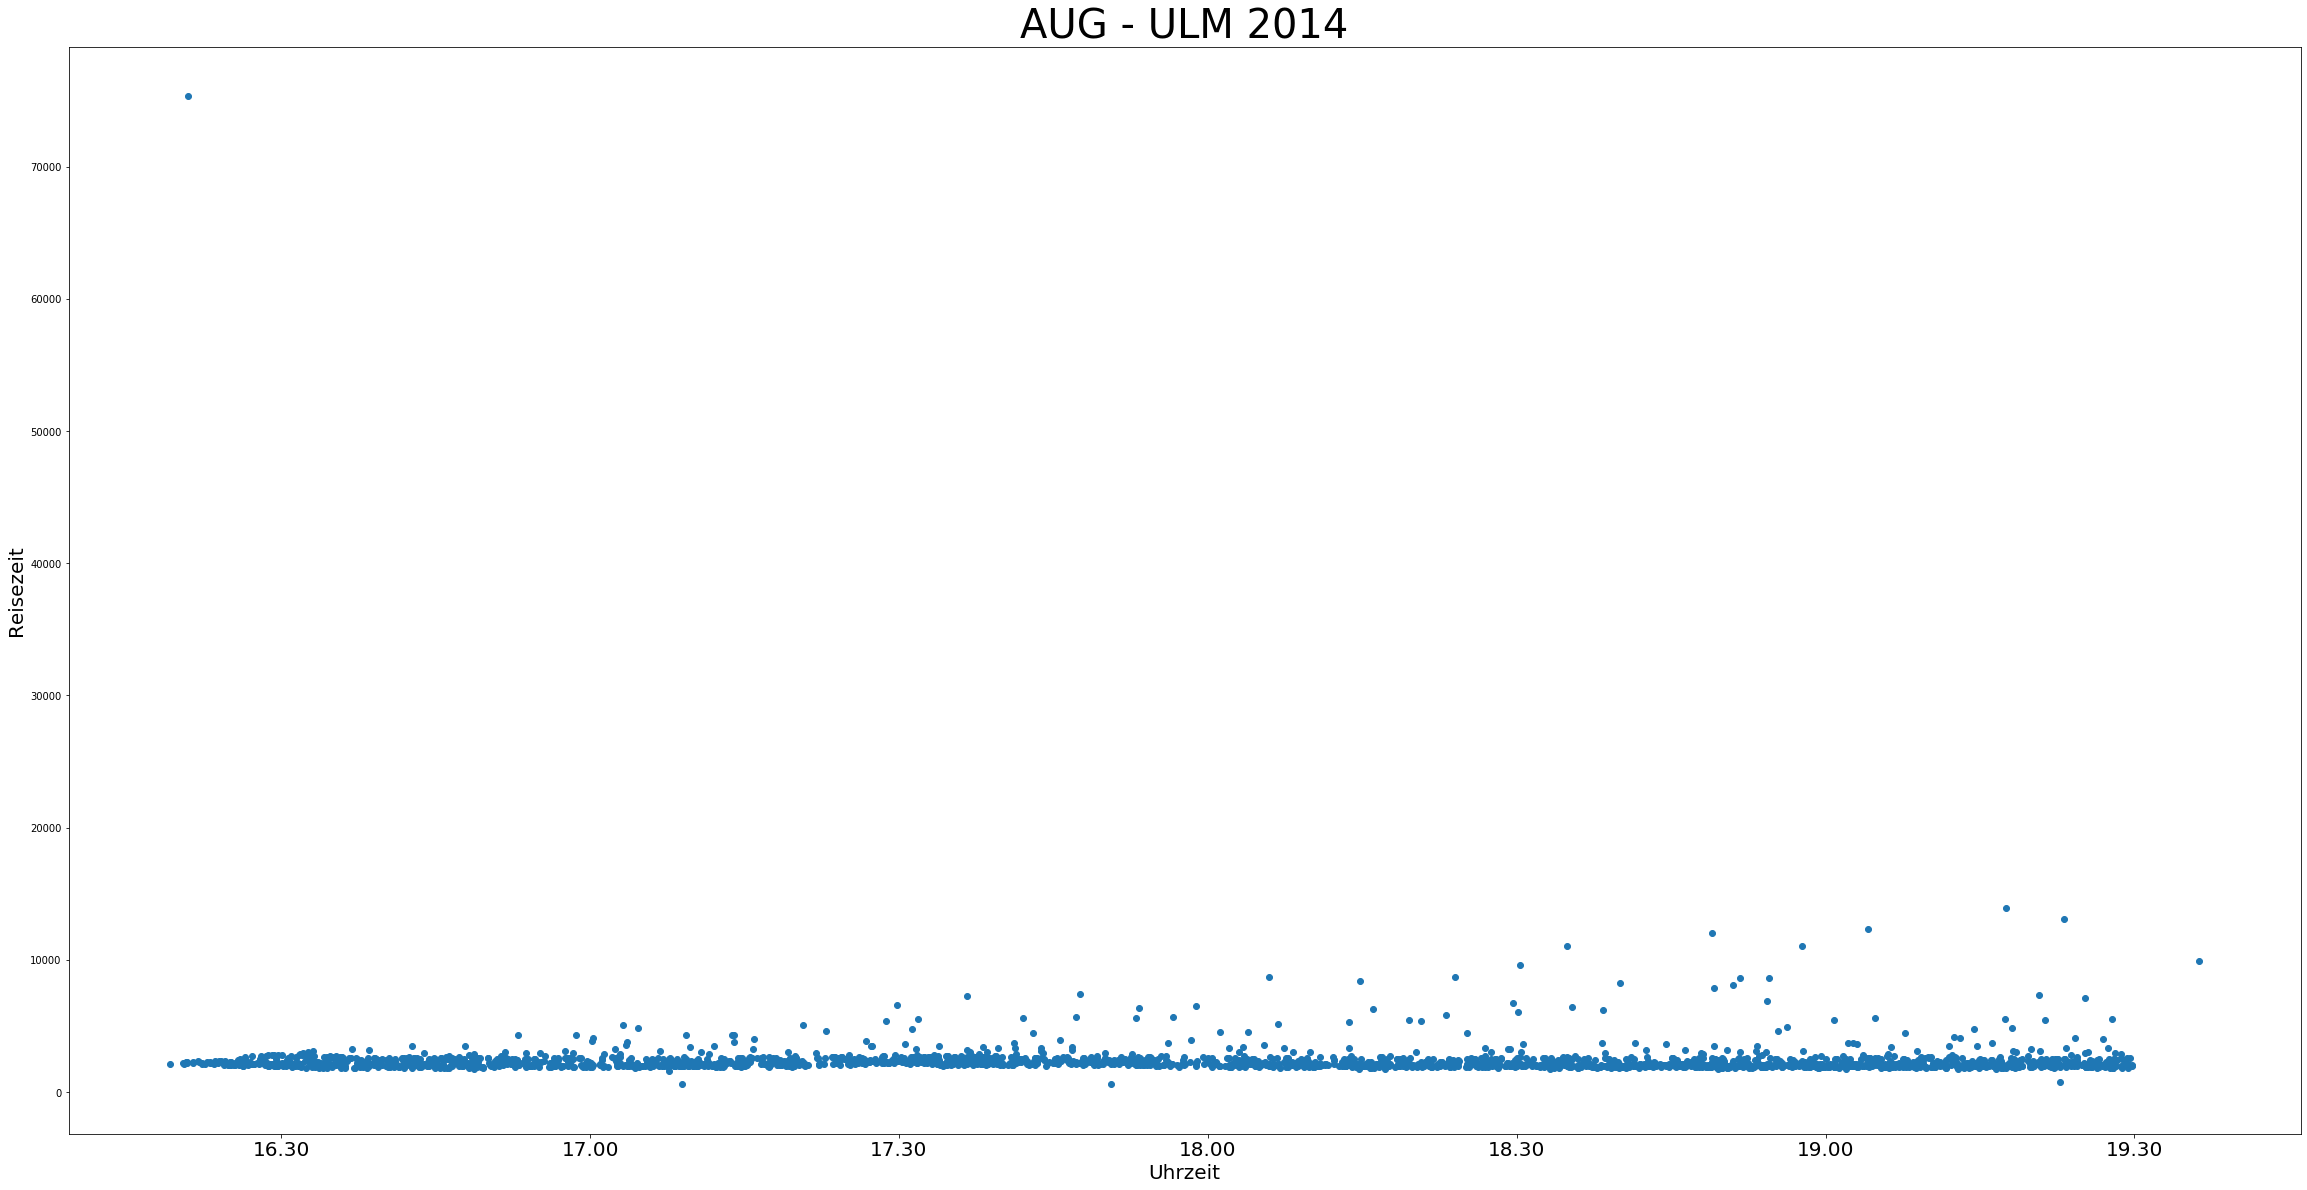

In [55]:
detected_cars.pop('License', None)
print("Detected Cars 2014: ", str(len(detected_cars)))

data = {"x":[], "y":[], "label":[]}
for label, coord in detected_cars.items():
    
    data["x"].append(coord[0])
    data["y"].append(coord[-1].seconds)
    data["label"].append(label)

fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
plt.title('AUG - ULM 2014', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Reisezeit', fontsize=20)

plt.scatter(data["x"], data["y"])

In [56]:
dp_data = pd.DataFrame.from_dict(data)
dp_data = dp_data[dp_data.y <= 3000]
dp_data = dp_data[dp_data.y >= 1000]

In [57]:
x = []

for i in data["x"]:
    date_time = datetime.strptime(str(i), "%H:%M:%S")

    #print(date_time)

    a_timedelta = date_time - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    x.append(seconds)
    #print(seconds)
y = np.array(data["y"])
x = np.array(x)

In [58]:
x_plot = x
x = x.reshape(-1,1)

In [59]:
poly = PolynomialFeatures(degree=15)

In [60]:
x_poly = poly.fit_transform(x)

In [61]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=15, include_bias=True, interaction_only=False,
                   order='C')

In [63]:
linreg = LinearRegression()
linreg.fit(x_poly, y)
y_pred = linreg.predict(x_poly)

['0:38:44.850386' '0:38:44.850425' '0:38:44.850457' ... '0:41:10.517485'
 '0:41:10.649734' '0:41:12.269639']


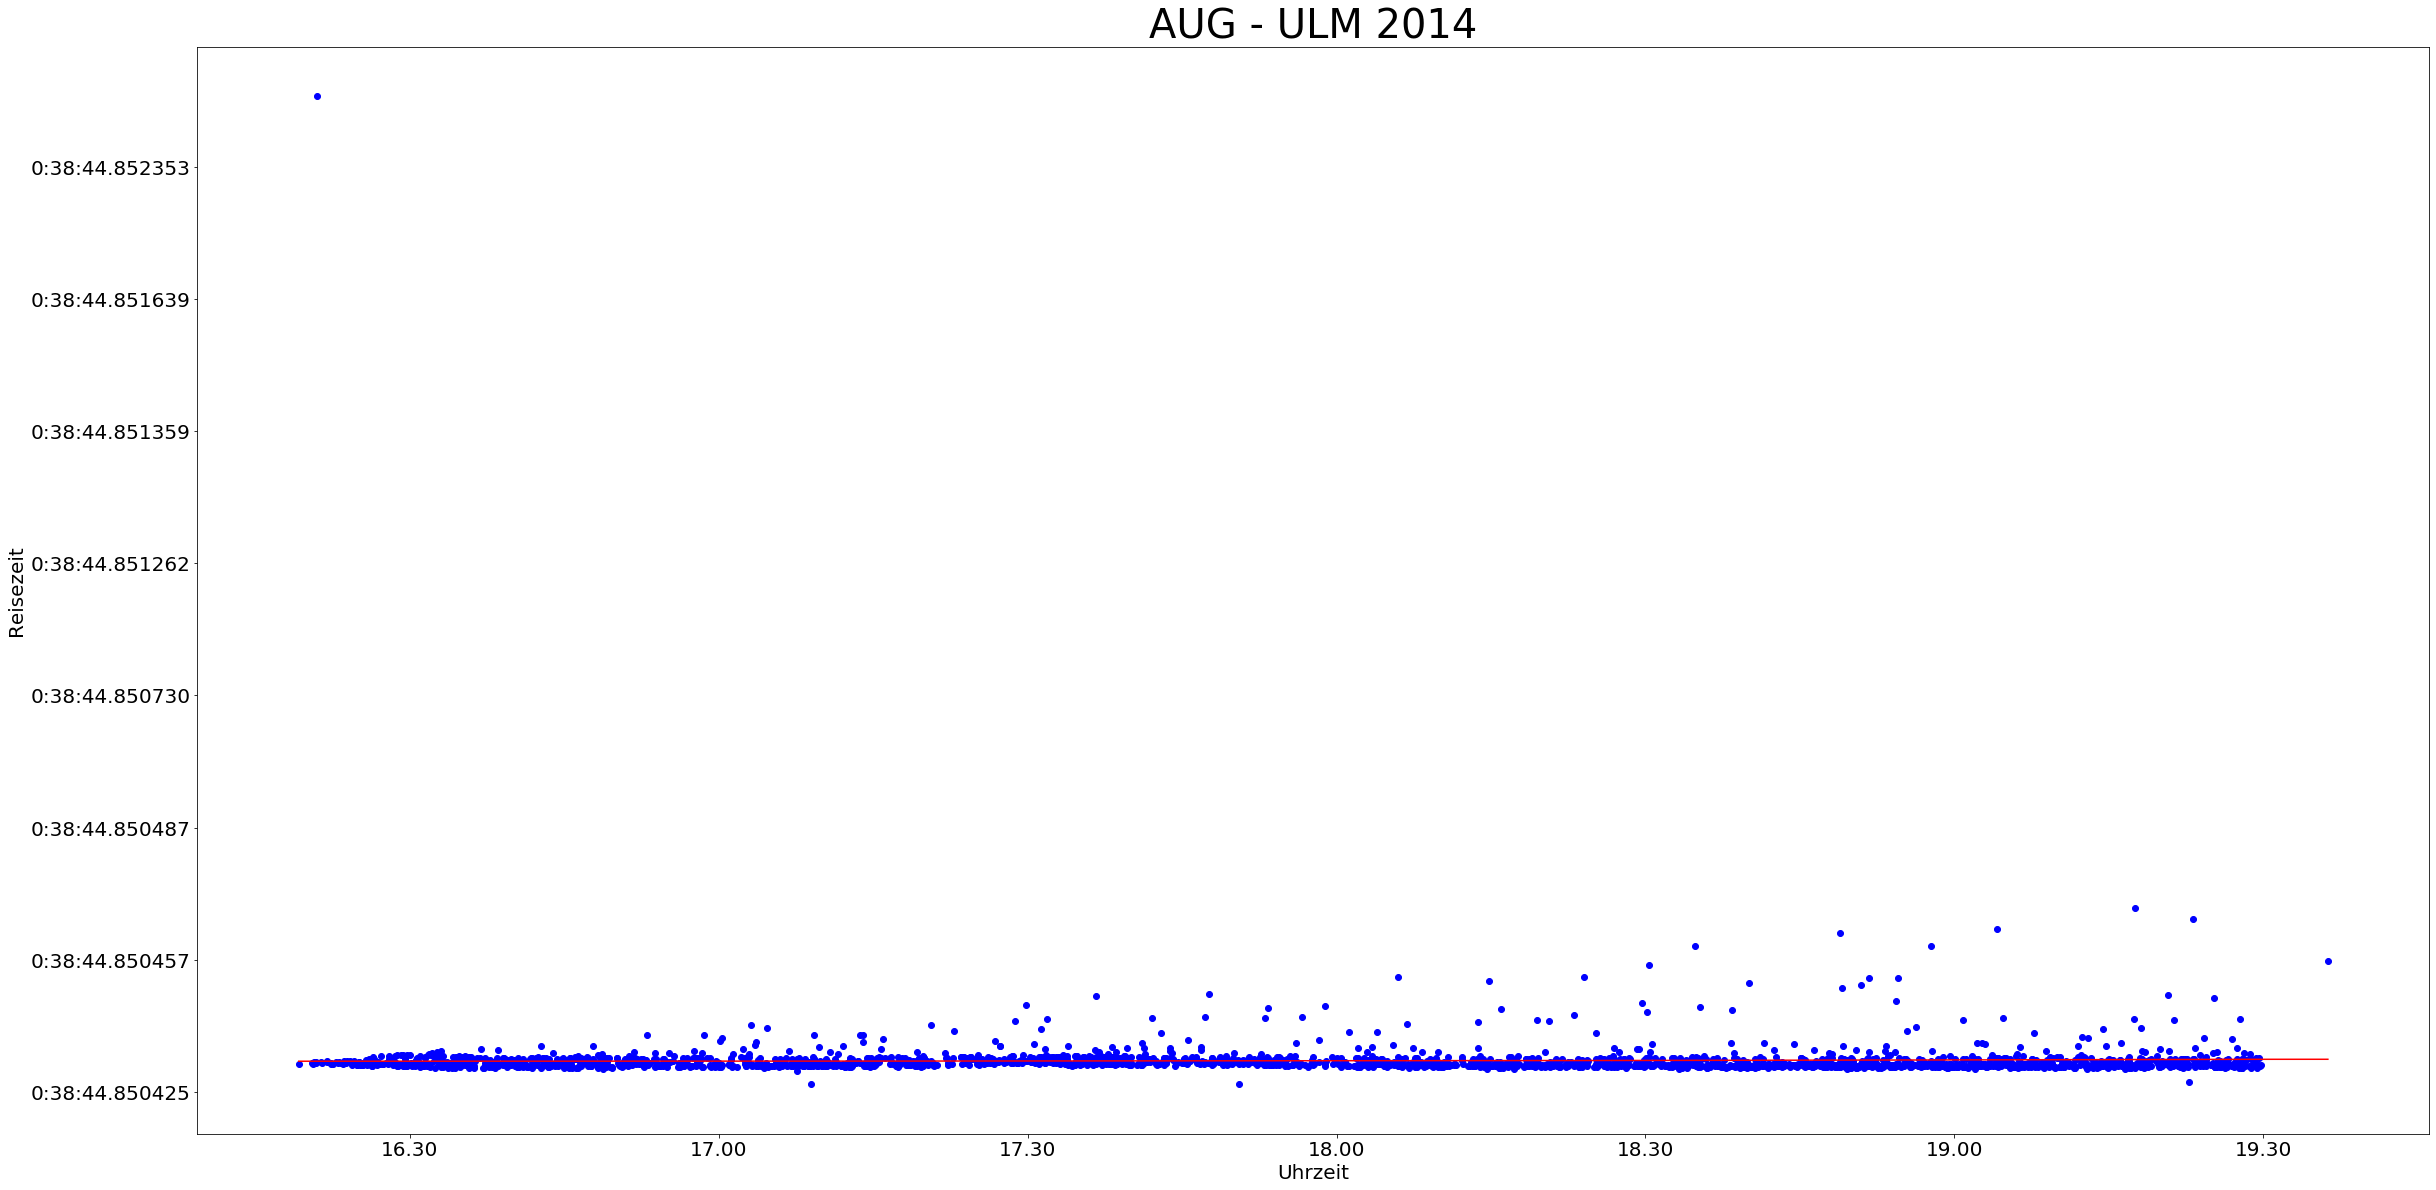

In [64]:
labels = np.array([str(timedelta(seconds=s)) for s in y_pred])
print(np.sort(labels))

fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
ax.set_yticklabels(np.sort(labels), fontsize=20)
plt.scatter(x, y, color="blue")
plt.title('AUG - ULM 2014', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Reisezeit', fontsize=20)
plt.plot(np.unique(x), np.unique(y_pred), color="red")

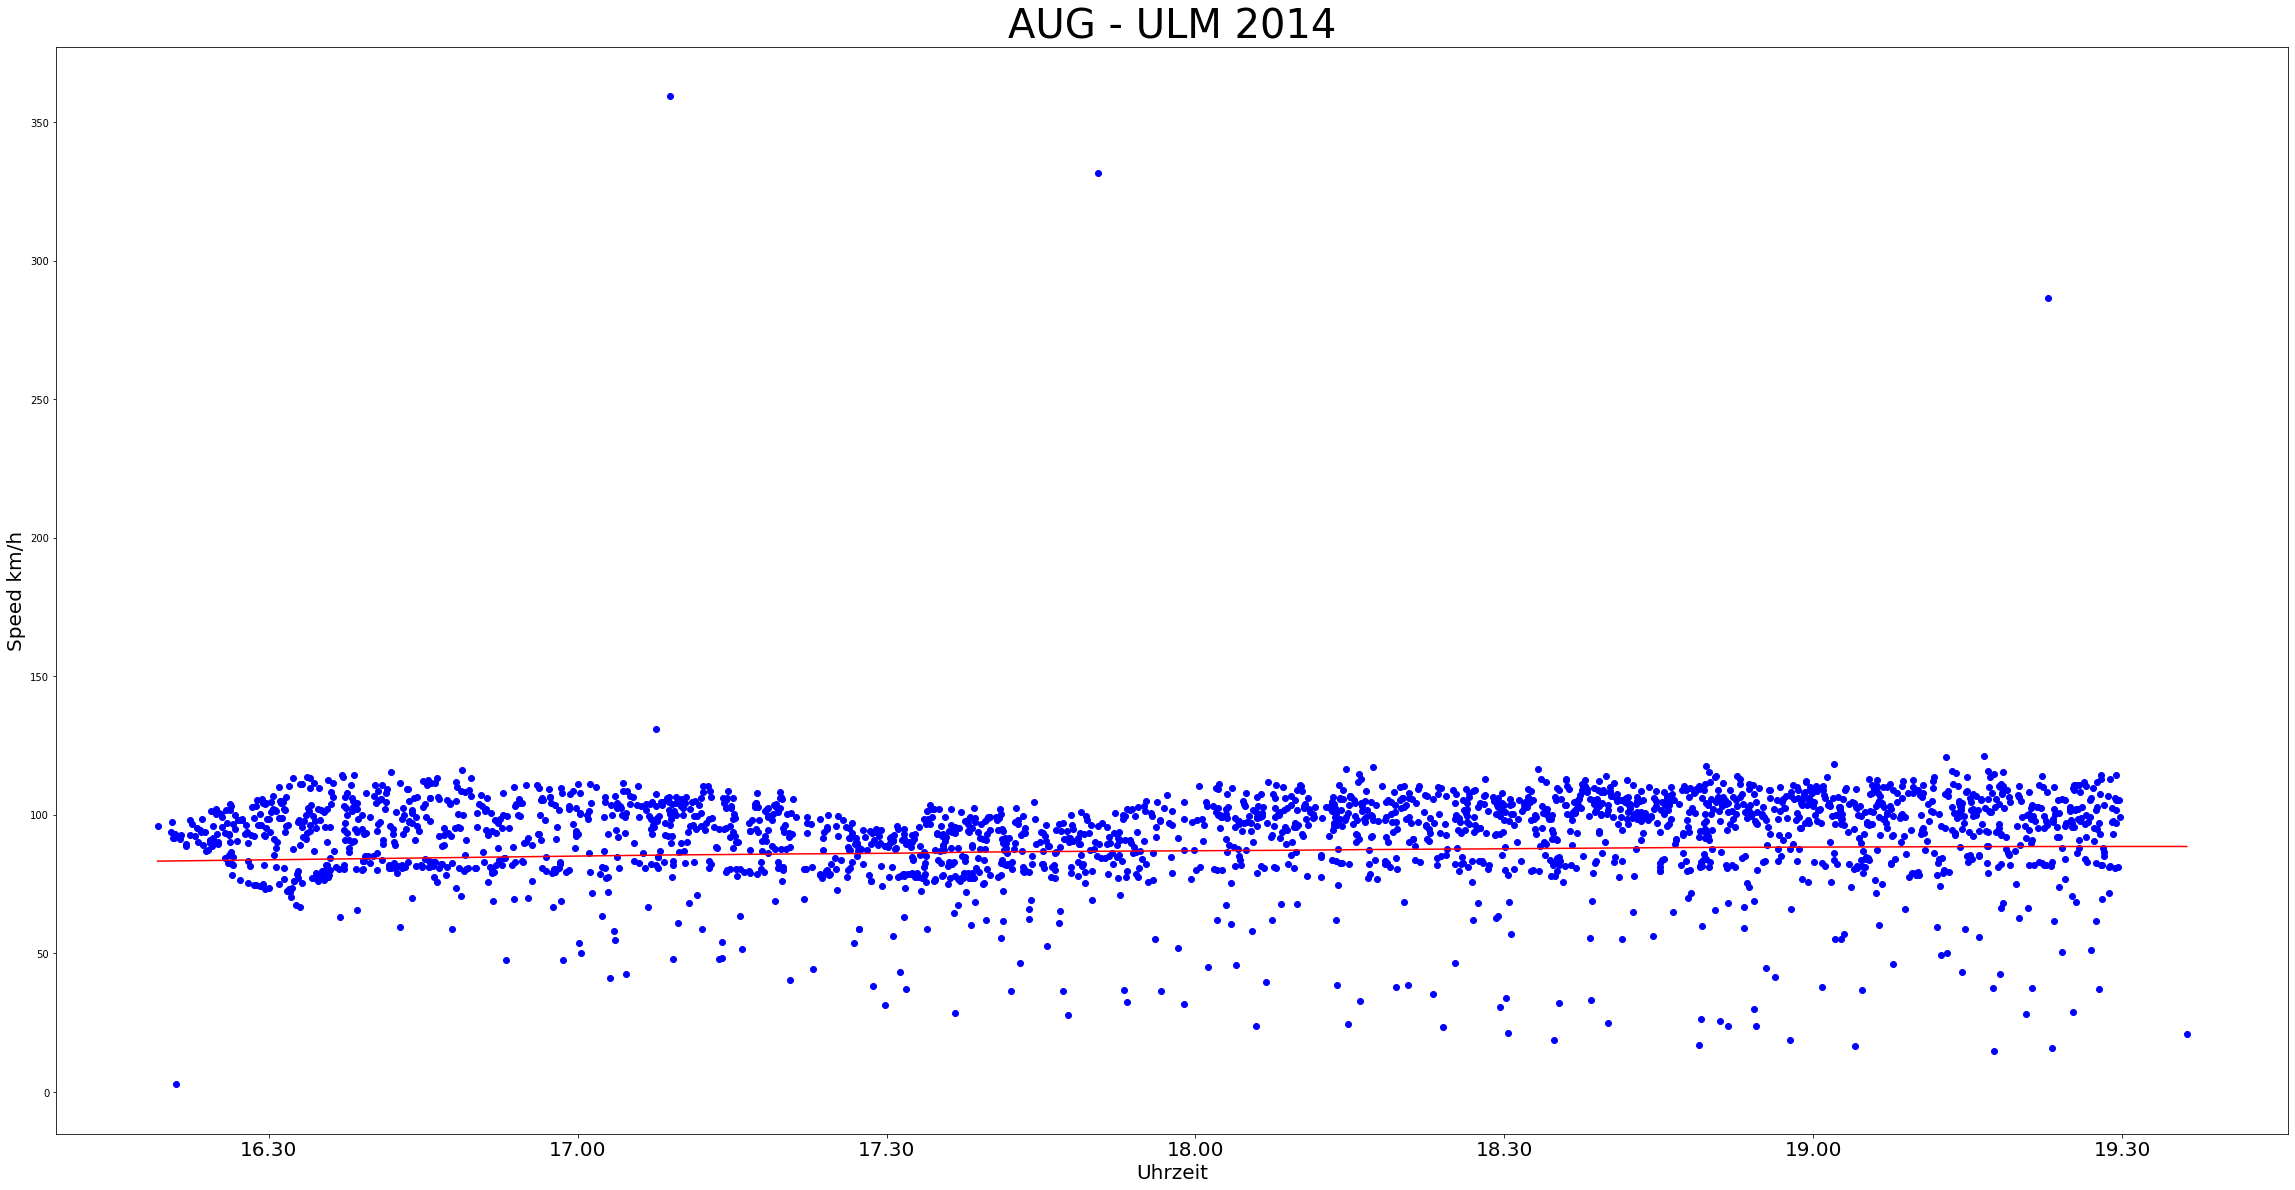

In [65]:
y = np.array([(57.2/s)*3600 for s in y])
y_pred = np.array([(57.2/s)*3600 for s in y_pred])

fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
plt.scatter(x, y, color="blue")
plt.title('AUG - ULM 2014', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Speed km/h', fontsize=20)
plt.plot(np.unique(x), np.unique(y_pred), color="red")

In [66]:

data = []
with open("2016_TU_EV_STU_AUG.csv") as f:
    lis = [line.split() for line in f]
    for x in lis:
        x = x[0]#print the list items
        x = x[:-1].split(';')
        data.append(x)
        
df_a = pd.DataFrame(data, columns=["id", "Nummernschild", "date", "Uhrzeit", "One", "Messtelle", "country", "state", "city", "confidence"]) 
#df_a = df_a.drop(columns=['district'])
df_a = df_a.drop(columns=['One'])
df_a = df_a.sort_values(by=['Uhrzeit'])


with open("2016_TU_EV_STU_ULM.csv", encoding='ISO-8859-1') as f:
    lis = [line.split() for line in f]
    for x in lis:
        x = x[0]#print the list items
        x = x[:-1].split(';')
        data.append(x)
        
df_u = pd.DataFrame(data, columns=["id", "Nummernschild", "date", "Uhrzeit", "One", "Messtelle", "country", "state", "city", "confidence"])
df_u = df_u.drop(columns=['One'])

df_u = df_u.sort_values(by=['Uhrzeit'])


In [67]:
import datetime as dt

detected_cars = {"License": ["Last Read", "Cam", "Duration"]}

df_merged = df_a.merge(df_u, how='outer')

df_merged = df_merged[df_merged.duplicated(['Nummernschild'], keep='first')].merge(df_merged[df_merged.duplicated(['Nummernschild'], keep='last')], how='outer')

print("Total data count 2016: ", str(len(df_merged)))

detected_cars = {"License": ["First Read", "Last Read", "Cam1", "Cam2", "Duration"]}

grouped = df_merged.groupby('Nummernschild') 
for name, group in grouped:
    detected_cars[name] = [group['Uhrzeit'].iloc[0], group['Uhrzeit'].iloc[-1], group['Messtelle'].iloc[0], group['Messtelle'].iloc[-1], datetime.combine(date.today(), dt.datetime.strptime(group['Uhrzeit'].iloc[0], '%H:%M:%S').time()) - datetime.combine(date.today(), dt.datetime.strptime(group['Uhrzeit'].iloc[-1], '%H:%M:%S').time())]
    print(group)
    #print(detected_cars[name])

Total data count 2016:  1318
       id                     Nummernschild        date   Uhrzeit Messtelle  \
114   518  008c7112803f6dd3381ed683b74e16d7  19.07.2016  16:41:50    TUM-09   
770  3066  008c7112803f6dd3381ed683b74e16d7  19.07.2016  16:11:07    TUM-08   

         country              state       city confidence  
114  Deutschland  Baden-Wrttemberg  Bblingen       None  
770  Deutschland  Baden-Württemberg  Böblingen       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
216  3561  010e580c5d3eed14a49aef2b77ff8cef  19.07.2016  17:17:34    TUM-01   
900  3675  010e580c5d3eed14a49aef2b77ff8cef  19.07.2016  16:57:47    TUM-08   

         country          state       city confidence  
216  Deutschland  Niedersachsen  Osnabrck       None  
900  Deutschland  Niedersachsen  Osnabrück       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
515   2057  021a6576bc5cfb76ef114cebb67c3ea1  19.07.2016  19:18:52 

       id                     Nummernschild        date   Uhrzeit Messtelle  \
203   855  0d0bc5a023e993b14ffca20b2f0cf499  19.07.2016  17:12:47    TUM-09   
814  3253  0d0bc5a023e993b14ffca20b2f0cf499  19.07.2016  16:26:29    TUM-08   

         country            state             city confidence  
203  Deutschland  Rheinland-Pfalz  Saarpfalz-Kreis       None  
814  Deutschland  Rheinland-Pfalz  Saarpfalz-Kreis       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
130   565  0dc9899241194a84b7275b92cc4133c4  19.07.2016  16:45:53    TUM-09   
784  3129  0dc9899241194a84b7275b92cc4133c4  19.07.2016  16:16:34    TUM-08   

         country              state          city confidence  
130  Deutschland  Baden-Wrttemberg  Ortenaukreis       None  
784  Deutschland  Baden-Württemberg  Ortenaukreis       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
200   849  0df34a7a8950cf6875f707e7232adb1e  19.07.2016  17:12:1

       id                     Nummernschild        date   Uhrzeit Messtelle  \
284  1138  1ce825b7fde1b3f876b0ee4cd12ce7bb  19.07.2016  17:38:16    TUM-09   
925  2353  1ce825b7fde1b3f876b0ee4cd12ce7bb  19.07.2016  17:05:41    TUM-07   

         country              state              city confidence  
284  Deutschland  Baden-Wrttemberg  Esslingen/Neckar       None  
925  Deutschland  Baden-Württemberg  Esslingen/Neckar       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
631   2372  1d1dcca3655aa85a9d36032113cc4f17  19.07.2016  19:54:45    TUM-09   
1295  3425  1d1dcca3655aa85a9d36032113cc4f17  19.07.2016  19:31:00    TUM-07   

     country state city confidence  
631        -                    85  
1295       -                    84  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
417   1630  1ef17f8f9ba58f9e8fe98660ec7a4cb0  19.07.2016  18:24:28    TUM-09   
1075  4519  1ef17f8f9ba58f9e8fe98660ec7a4cb0  19.

       id                     Nummernschild        date   Uhrzeit Messtelle  \
191   824  2d0bee1528cafbfeece4e4b813893a3e  19.07.2016  17:09:51    TUM-09   
868  3501  2d0bee1528cafbfeece4e4b813893a3e  19.07.2016  16:46:23    TUM-08   

         country   state     city confidence  
191  Deutschland  Bayern  Mnchen       None  
868  Deutschland  Bayern  München       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
511   2048  2d5e0411f0464e41d09b3ad482f2f169  19.07.2016  19:17:36    TUM-09   
1177  5148  2d5e0411f0464e41d09b3ad482f2f169  19.07.2016  18:52:40    TUM-08   

          country   state              city confidence  
511   Deutschland  Bayern  Frstenfeldbruck       None  
1177  Deutschland  Bayern  Fürstenfeldbruck       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
158   688  2dc688e57435dbb18475fca2b6c29d6f  19.07.2016  16:57:45    TUM-09   
840  3369  2dc688e57435dbb18475fca2b6c29d6f  19.07.

        id                     Nummernschild        date   Uhrzeit Messtelle  \
588   2270  3b7f75987503306d023e983d8aca3a98  19.07.2016  19:43:30    TUM-09   
1247  5404  3b7f75987503306d023e983d8aca3a98  19.07.2016  19:19:17    TUM-08   

          country              state         city confidence  
588   Deutschland  Baden-Wrttemberg  Ludwigsburg       None  
1247  Deutschland  Baden-Württemberg  Ludwigsburg       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
272  1092  3c5b02590854d00507412d737ed0ad4a  19.07.2016  17:33:46    TUM-09   
942  2403  3c5b02590854d00507412d737ed0ad4a  19.07.2016  17:10:26    TUM-07   

         country                state       city confidence  
272  Deutschland  Nordrhein-Westfalen  Remscheid       None  
942  Deutschland  Nordrhein-Westfalen  Remscheid       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
649   4878  3c9473ab1682e96d3fd40db7113cefb4  19.07.2016  19:58:47

        id                     Nummernschild        date   Uhrzeit Messtelle  \
536   2127  4b24e1785b5cfe8672b034e6e38e018d  19.07.2016  19:26:19    TUM-09   
1206  5262  4b24e1785b5cfe8672b034e6e38e018d  19.07.2016  19:03:29    TUM-08   

          country              state       city confidence  
536   Deutschland  Baden-Wrttemberg  Gppingen       None  
1206  Deutschland  Baden-Württemberg  Göppingen       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
640   4862  4b4d0fcff37ae8c9c0ab62f209fd5460  19.07.2016  19:57:13    TUM-01   
1288  5517  4b4d0fcff37ae8c9c0ab62f209fd5460  19.07.2016  19:30:02    TUM-08   

          country   state      city confidence  
640   Deutschland  Hessen  Frankfur       None  
1288  Deutschland  Hessen  Frankfur       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
42    210  4b7ceb644a9adf14f1770a68939f36b4  19.07.2016  16:11:51    TUM-09   
695  2770  4b7ceb644a9adf14f17

       id                     Nummernschild        date   Uhrzeit Messtelle  \
358  1400  5a2e811078f9c5efb1cf8249b2281757  19.07.2016  18:01:06    TUM-09   
983  4036  5a2e811078f9c5efb1cf8249b2281757  19.07.2016  17:22:30    TUM-08   

    country state city confidence  
358       -                    87  
983       -                    86  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
52    247  5a52f458eccecd88b7a5faea18ec5fff  19.07.2016  16:16:38    TUM-09   
715  2837  5a52f458eccecd88b7a5faea18ec5fff  19.07.2016  15:52:49    TUM-08   

         country          state     city confidence  
52   Deutschland  Niedersachsen  Emsland       None  
715  Deutschland  Niedersachsen  Emsland       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
440   1771  5adef6e69fbda039f0df5d0ffad56bf5  19.07.2016  18:43:10    TUM-09   
1093  4682  5adef6e69fbda039f0df5d0ffad56bf5  19.07.2016  18:14:16    TUM-08   

          cou

        id                     Nummernschild        date   Uhrzeit Messtelle  \
598   2297  69d14f8380bbb0f56a82f49c4f0cb115  19.07.2016  19:46:37    TUM-09   
1277  5484  69d14f8380bbb0f56a82f49c4f0cb115  19.07.2016  19:26:33    TUM-08   

          country state  city confidence  
598   Deutschland        Frei       None  
1277  Deutschland        Frei       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
578   2235  69d45c0b8c5e15974497b43b57e42c5b  19.07.2016  19:39:18    TUM-09   
1221  5300  69d45c0b8c5e15974497b43b57e42c5b  19.07.2016  19:07:04    TUM-08   

          country            state                city confidence  
578   Deutschland  Rheinland-Pfalz  Ludwigshafen/Rhein       None  
1221  Deutschland  Rheinland-Pfalz  Ludwigshafen/Rhein       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
129  3306  69e42b988f53e44eea4b97dc86a88d86  19.07.2016  16:45:30    TUM-01   
798  1952  69e42b988f53e44e

       id                     Nummernschild        date   Uhrzeit Messtelle  \
296  1171  7976297180956977a4b74e546464b931  19.07.2016  17:40:45    TUM-09   
966  2471  7976297180956977a4b74e546464b931  19.07.2016  17:16:33    TUM-07   

         country   state       city confidence  
296  Deutschland  Bayern  Rosenheim       None  
966  Deutschland  Bayern  Rosenheim       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
254  3731  799583b80f5fcb4de8b3479e055998f0  19.07.2016  17:28:55    TUM-01   
917  3742  799583b80f5fcb4de8b3479e055998f0  19.07.2016  17:02:31    TUM-08   

         country              state       city confidence  
254  Deutschland  Baden-Wrttemberg  Gppingen       None  
917  Deutschland  Baden-Württemberg  Göppingen       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
343   1340  79d31cbffb7a52ef8ae3dea630f161dc  19.07.2016  17:55:53    TUM-09   
1014  2612  79d31cbffb7a52ef8ae3dea63

        id                     Nummernschild        date   Uhrzeit Messtelle  \
535   2125  86962fa564206ef7ff70d770d8279fcb  19.07.2016  19:26:14    TUM-09   
1224  5306  86962fa564206ef7ff70d770d8279fcb  19.07.2016  19:07:43    TUM-08   

          country              state       city confidence  
535   Deutschland  Baden-Wrttemberg  Karlsruhe       None  
1224  Deutschland  Baden-Württemberg  Karlsruhe       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
86    381  86f12950440de62dca65837dd898fbb7  19.07.2016  16:29:24    TUM-09   
750  2976  86f12950440de62dca65837dd898fbb7  19.07.2016  16:04:56    TUM-08   

         country              state     city confidence  
86   Deutschland  Baden-Wrttemberg  Rastatt       None  
750  Deutschland  Baden-Württemberg  Rastatt       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
602   2304  875c3c392087c6e7e929f374bc5d388f  19.07.2016  19:47:44    TUM-09   
1268

        id                     Nummernschild        date   Uhrzeit Messtelle  \
375   1461  935b80b219f9a55b8b99314920e30bdf  19.07.2016  18:07:59    TUM-09   
1036  4303  935b80b219f9a55b8b99314920e30bdf  19.07.2016  17:43:01    TUM-08   

          country                state      city confidence  
375   Deutschland  Nordrhein-Westfalen  Mettmann       None  
1036  Deutschland  Nordrhein-Westfalen  Mettmann       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
49    235  947bcbe58223ad65571e687b69df1a01  19.07.2016  16:15:00    TUM-09   
703  2783  947bcbe58223ad65571e687b69df1a01  19.07.2016  15:47:35    TUM-08   

         country                state            city confidence  
49   Deutschland  Nordrhein-Westfalen  Recklinghausen       None  
703  Deutschland  Nordrhein-Westfalen  Recklinghausen       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
236  3645  94be43c63aa477e522ad01cda4c03f24  19.07.2016

        id                     Nummernschild        date   Uhrzeit Messtelle  \
654   4887  a548ca4430c6f5b485f2b62a356bdf84  19.07.2016  19:59:50    TUM-01   
1298  5536  a548ca4430c6f5b485f2b62a356bdf84  19.07.2016  19:32:19    TUM-08   

          country              state         city confidence  
654   Deutschland  Baden-Wrttemberg  Ludwigsburg       None  
1298  Deutschland  Baden-Württemberg  Ludwigsburg       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
585   4703  a56fd5d94f2a1ae7c77bd51ffd10e486  19.07.2016  19:41:15    TUM-01   
1236  5357  a56fd5d94f2a1ae7c77bd51ffd10e486  19.07.2016  19:14:05    TUM-08   

          country   state     city confidence  
585   Deutschland  Bayern  Neu-Ulm       None  
1236  Deutschland  Bayern  Neu-Ulm       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
386   1498  a57f1f40d571b85fa27264ae7a4b8296  19.07.2016  18:11:09    TUM-09   
1048  4336  a57f1f40d571b

       id                     Nummernschild        date   Uhrzeit Messtelle  \
223  3599  b5bd8c59b54028ffd27bbfcf917cbc3d  19.07.2016  17:20:05    TUM-01   
851  2149  b5bd8c59b54028ffd27bbfcf917cbc3d  19.07.2016  16:40:38    TUM-07   

         country   state            city confidence  
223  Deutschland  Hessen  Offenbach/Main       None  
851  Deutschland  Hessen  Offenbach/Main       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
642   2393  b656ce5098c02ca5e15e20c68341694a  19.07.2016  19:57:26    TUM-09   
1304  5557  b656ce5098c02ca5e15e20c68341694a  19.07.2016  19:34:18    TUM-08   

          country                state       city confidence  
642   Deutschland  Nordrhein-Westfalen  Heinsberg       None  
1304  Deutschland  Nordrhein-Westfalen  Heinsberg       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
502   2025  b665395348a6d1f05282dee36ead4277  19.07.2016  19:14:41    TUM-09   
1172  5139

       id                     Nummernschild        date   Uhrzeit Messtelle  \
274  1097  c48cad1ccc282b8c8494f8fa104ad254  19.07.2016  17:34:00    TUM-09   
943  3857  c48cad1ccc282b8c8494f8fa104ad254  19.07.2016  17:10:45    TUM-08   

         country              state      city confidence  
274  Deutschland  Baden-Wrttemberg  Mannheim       None  
943  Deutschland  Baden-Württemberg  Mannheim       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
24    149  c49257e38dbb22e34edeb430396b4616  19.07.2016  16:06:19    TUM-09   
680  2712  c49257e38dbb22e34edeb430396b4616  19.07.2016  15:40:31    TUM-08   

         country   state     city confidence  
24   Deutschland  Bayern  Mnchen       None  
680  Deutschland  Bayern  München       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
451   1853  c4de8fef3ac56141f93d912abf6e453e  19.07.2016  18:54:41    TUM-09   
1112  3052  c4de8fef3ac56141f93d912abf6e453e  

691       -                    81  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
338  1307  d436eba9492a6cf69475bef487d09f7c  19.07.2016  17:53:04    TUM-09   
999  4125  d436eba9492a6cf69475bef487d09f7c  19.07.2016  17:28:49    TUM-08   

         country            state         city confidence  
338  Deutschland  Rheinland-Pfalz  Germersheim       None  
999  Deutschland  Rheinland-Pfalz  Germersheim       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
25    155  d4b81e1e59796d3f415c2116f850e297  19.07.2016  16:06:38    TUM-09   
674  2685  d4b81e1e59796d3f415c2116f850e297  19.07.2016  15:37:34    TUM-08   

         country              state       city confidence  
25   Deutschland  Baden-Wrttemberg  Pforzheim       None  
674  Deutschland  Baden-Württemberg  Pforzheim       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
601   2303  d524b29a33c20a40b9c77c04fc410925  19

        id                     Nummernschild        date   Uhrzeit Messtelle  \
339   1311  e5a9bf0729f3ca6b1c88ae046c30f6de  19.07.2016  17:53:10    TUM-09   
1004  4143  e5a9bf0729f3ca6b1c88ae046c30f6de  19.07.2016  17:30:07    TUM-08   

          country              state city confidence  
339   Deutschland  Baden-Wrttemberg  Ulm       None  
1004  Deutschland  Baden-Württemberg  Ulm       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
385   1491  e64f190cb45fa287e7008e10810d317e  19.07.2016  18:10:21    TUM-09   
1058  4412  e64f190cb45fa287e7008e10810d317e  19.07.2016  17:52:03    TUM-08   

          country              state              city confidence  
385   Deutschland  Baden-Wrttemberg  Esslingen/Neckar       None  
1058  Deutschland  Baden-Württemberg  Esslingen/Neckar       None  
        id                     Nummernschild        date   Uhrzeit Messtelle  \
369   1423  e68da167edcb9d69bcecc43c38296a18  19.07.2016  18:03:01   

        id                     Nummernschild        date   Uhrzeit Messtelle  \
564   4632  f3add04c09906ba40d1497942a318880  19.07.2016  19:34:30    TUM-01   
1199  3233  f3add04c09906ba40d1497942a318880  19.07.2016  19:00:51    TUM-07   

     country state city confidence  
564        -                    81  
1199       -                    81  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
288  1149  f3c892b5dbf65e96efe688e7fa0a278f  19.07.2016  17:39:01    TUM-09   
960  3923  f3c892b5dbf65e96efe688e7fa0a278f  19.07.2016  17:15:35    TUM-08   

         country   state      city confidence  
288  Deutschland  Bayern  Augsburg       None  
960  Deutschland  Bayern  Augsburg       None  
       id                     Nummernschild        date   Uhrzeit Messtelle  \
16     94  f3d4b507b4d34f9cb18b7b7a8cff6a8c  19.07.2016  16:01:19    TUM-09   
671  2678  f3d4b507b4d34f9cb18b7b7a8cff6a8c  19.07.2016  15:36:58    TUM-08   

         country            

Detected Cars 2016:  659


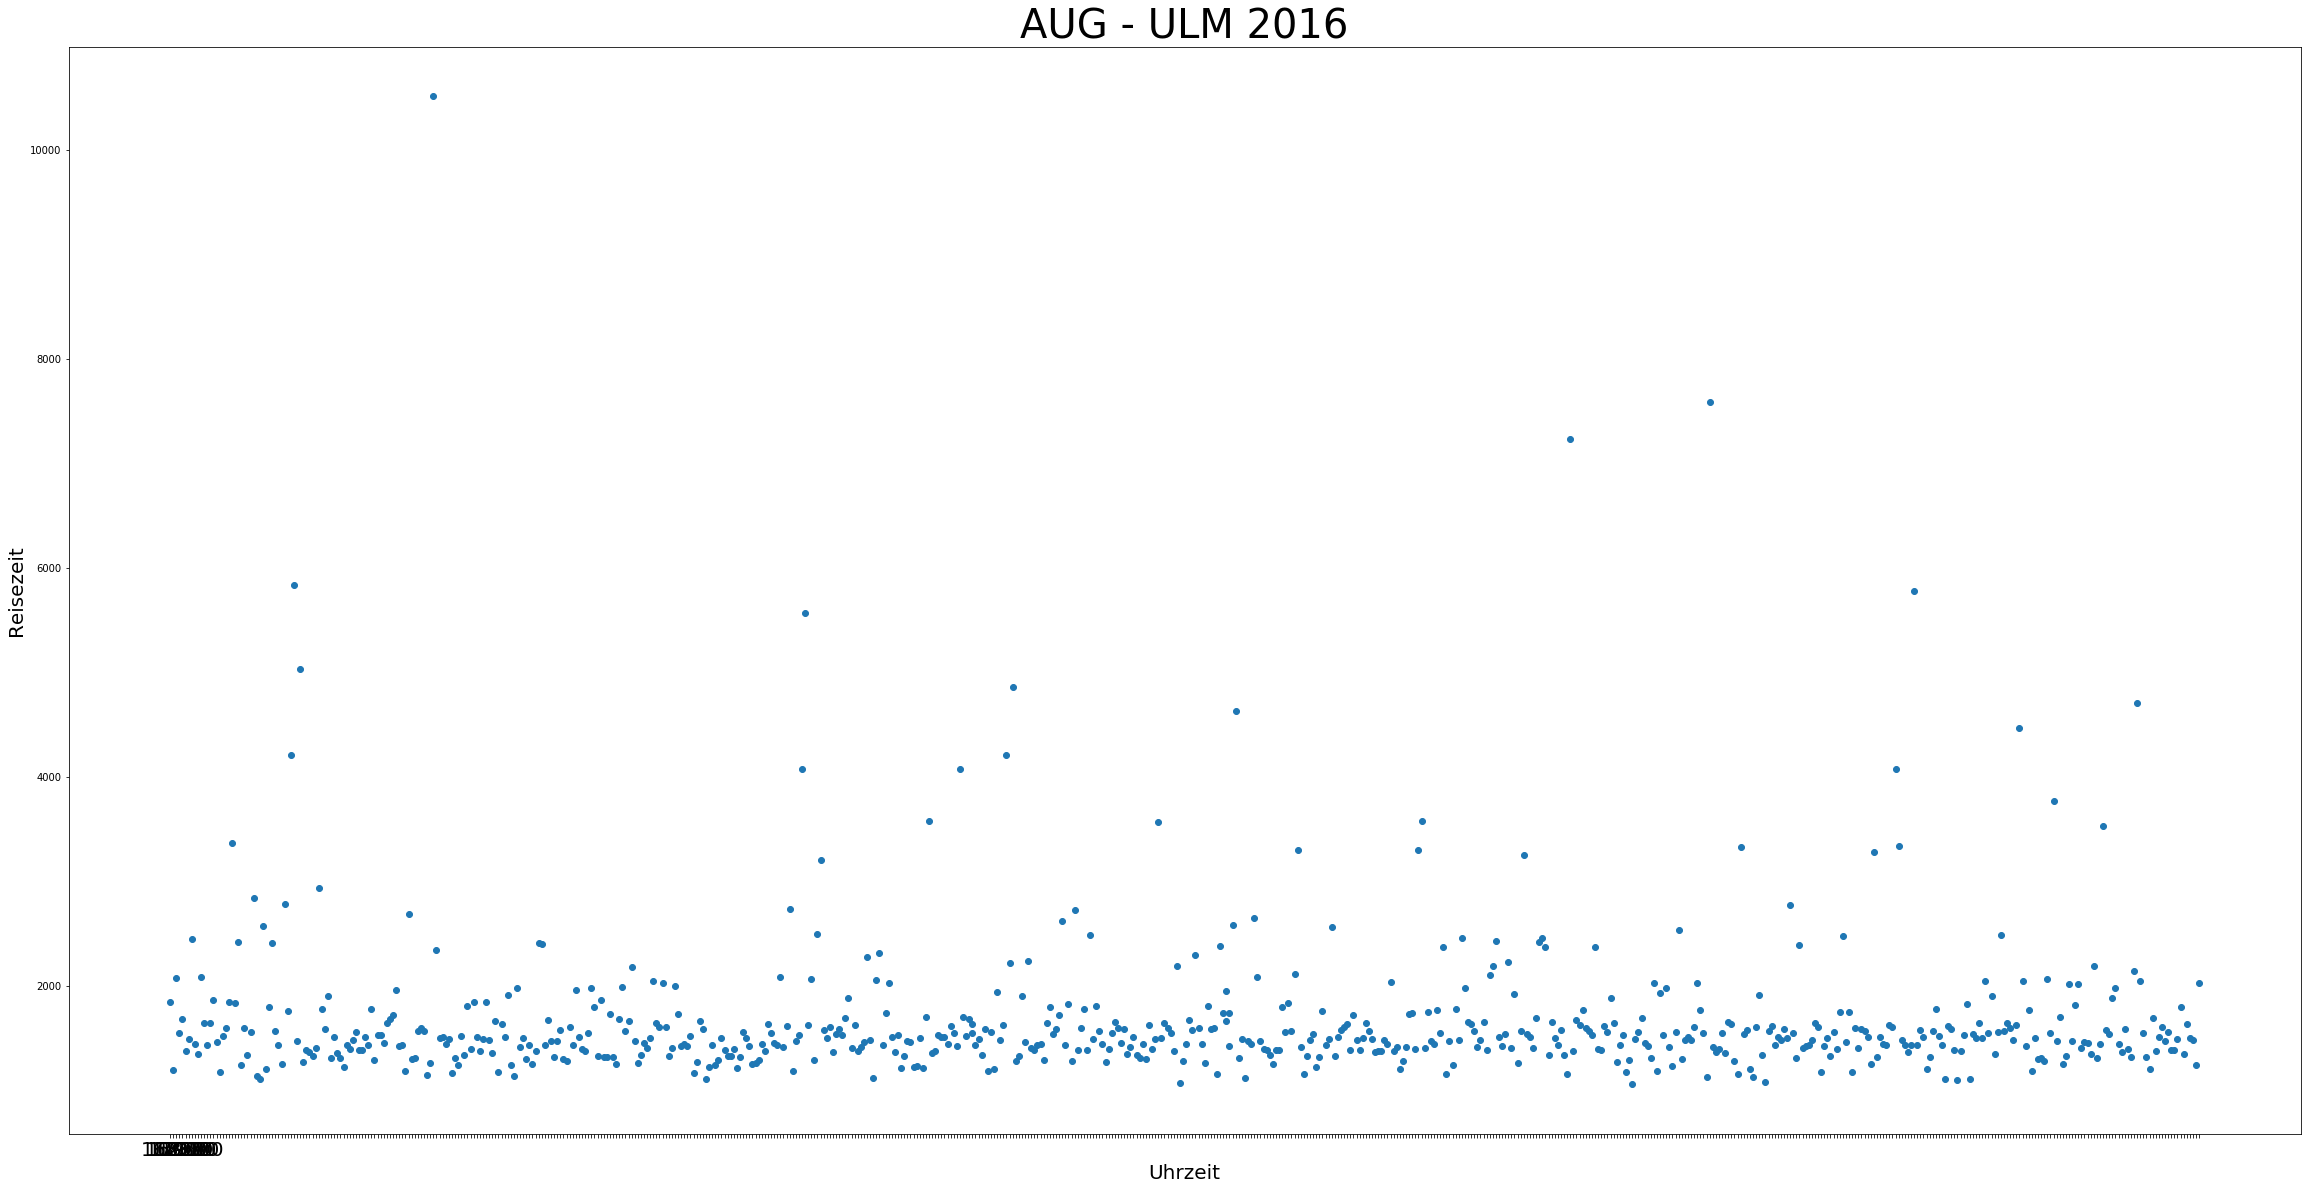

In [68]:
detected_cars.pop('License', None)

print("Detected Cars 2016: ", str(len(detected_cars)))

data = {"x":[], "y":[], "label":[]}
for label, coord in detected_cars.items():
    
    data["x"].append(coord[0])
    data["y"].append(coord[-1].seconds)
    data["label"].append(label)



fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
plt.title('AUG - ULM 2016', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Reisezeit', fontsize=20)
plt.scatter(data["x"], data["y"])

In [69]:
dp_data = pd.DataFrame.from_dict(data)
dp_data = dp_data[dp_data.y <= 3000]
dp_data = dp_data[dp_data.y >= 1000]

In [70]:
x = []

for i in data["x"]:
    date_time = datetime.strptime(i, "%H:%M:%S")

    #print(date_time)

    a_timedelta = date_time - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    x.append(seconds)
    #print(seconds)
y = np.array(data["y"])
x = np.array(x)

In [71]:
x_plot = x
x = x.reshape(-1,1)

In [72]:
poly = PolynomialFeatures(degree=10)

In [73]:
x_poly = poly.fit_transform(x)

In [74]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False,
                   order='C')

In [76]:
linreg = LinearRegression()
linreg.fit(x_poly, y)
y_pred = linreg.predict(x_poly)

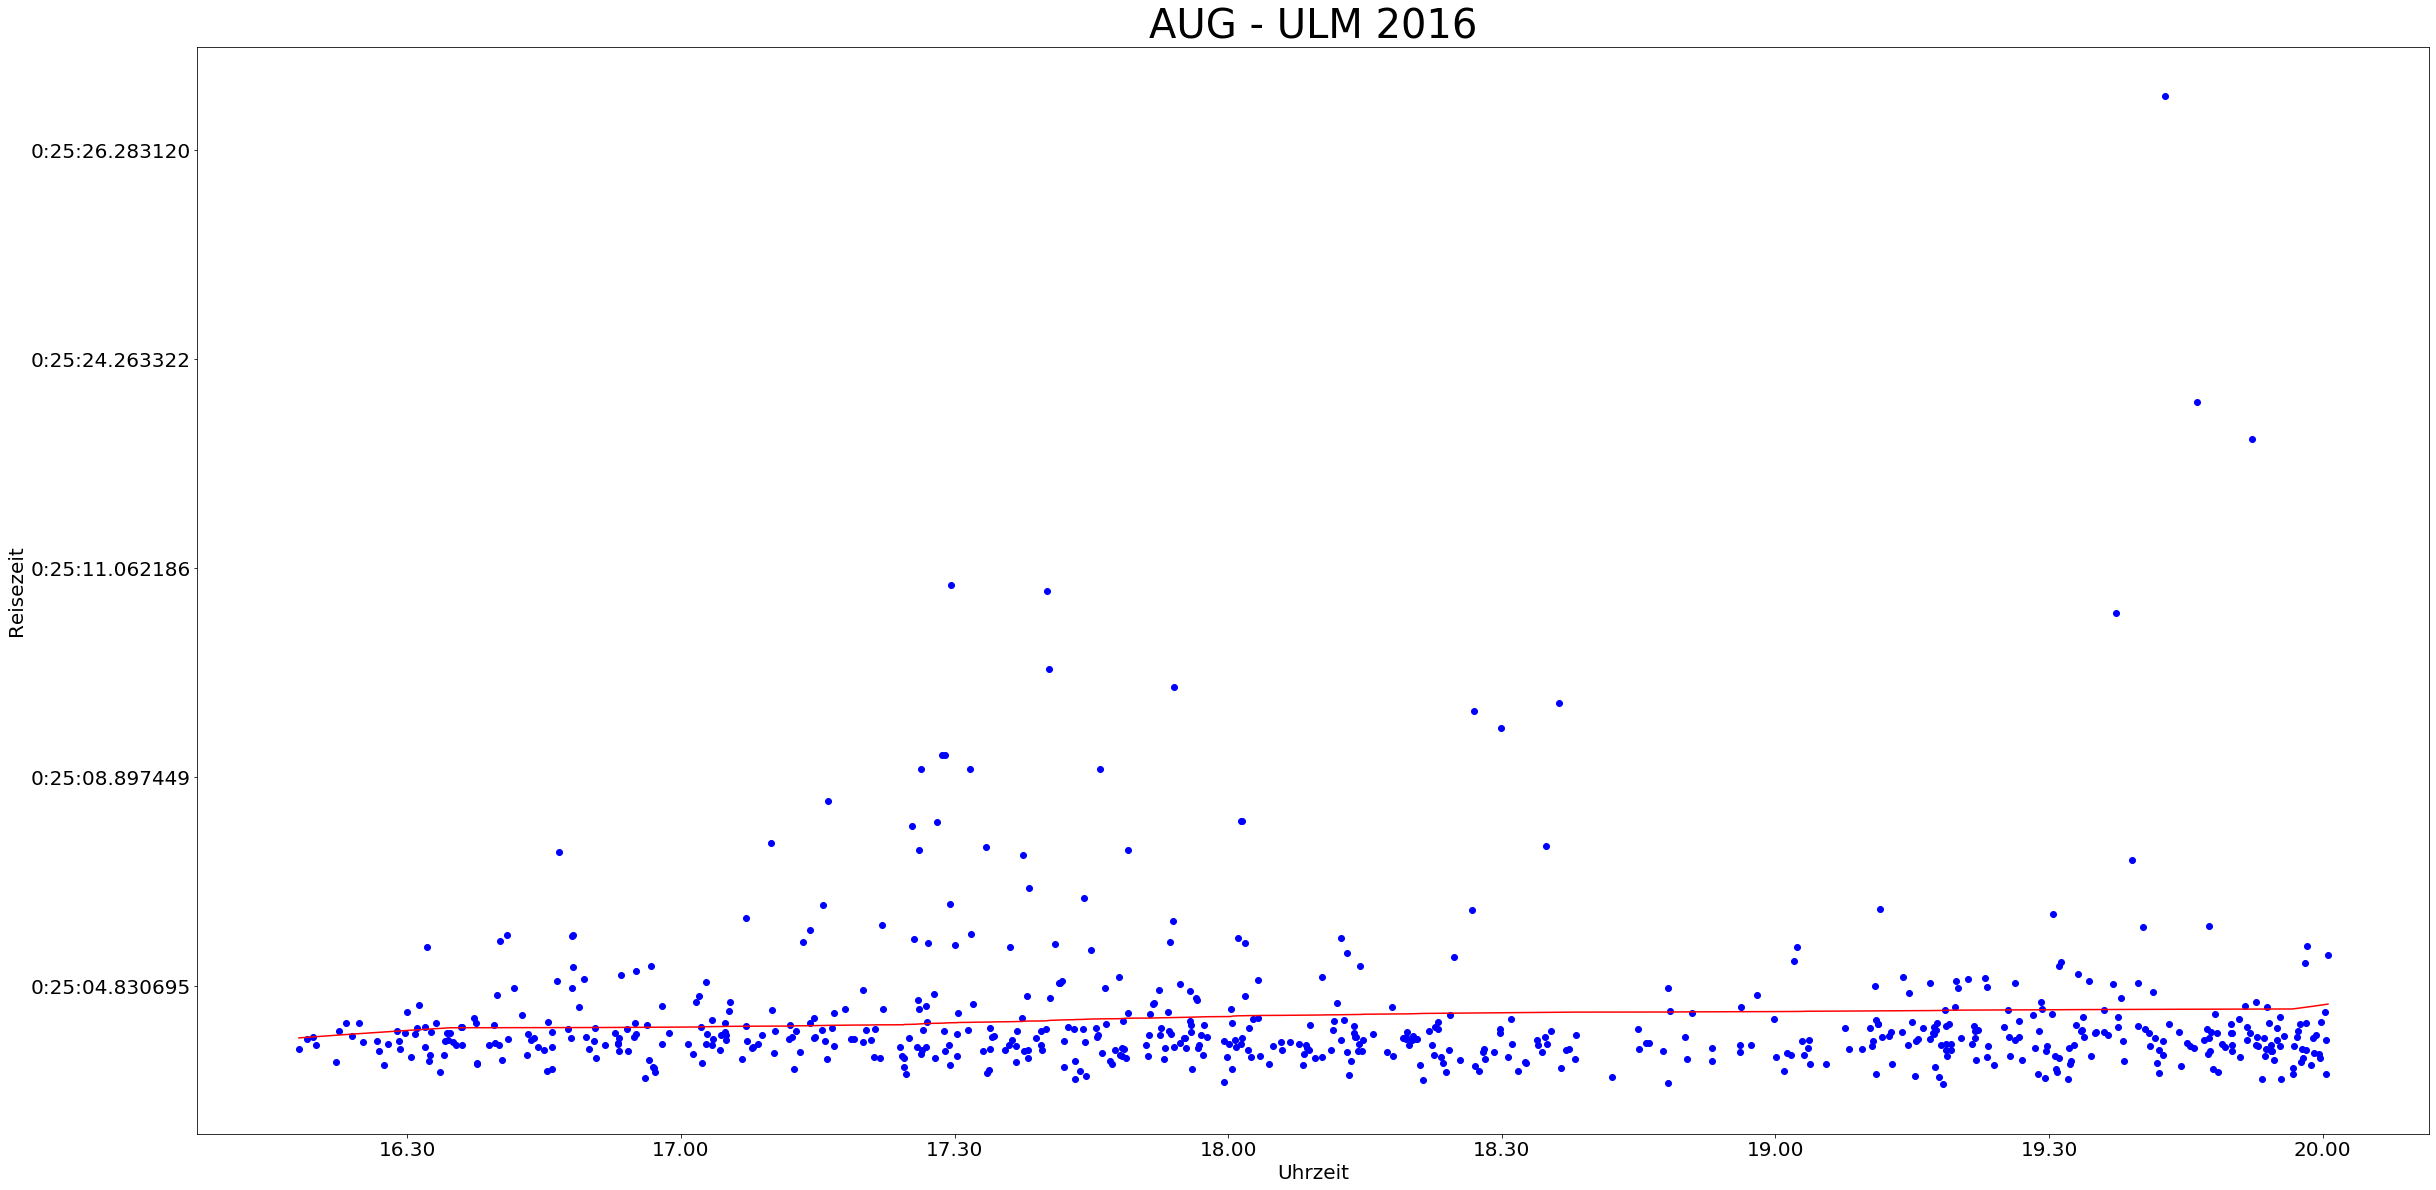

In [77]:
labels = np.array([str(timedelta(seconds=s)) for s in y_pred])

fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
ax.set_yticklabels(np.sort(labels), fontsize=20)
plt.scatter(x, y, color="blue")
plt.title('AUG - ULM 2016', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Reisezeit', fontsize=20)
plt.plot(np.unique(x), np.unique(y_pred), color="red")

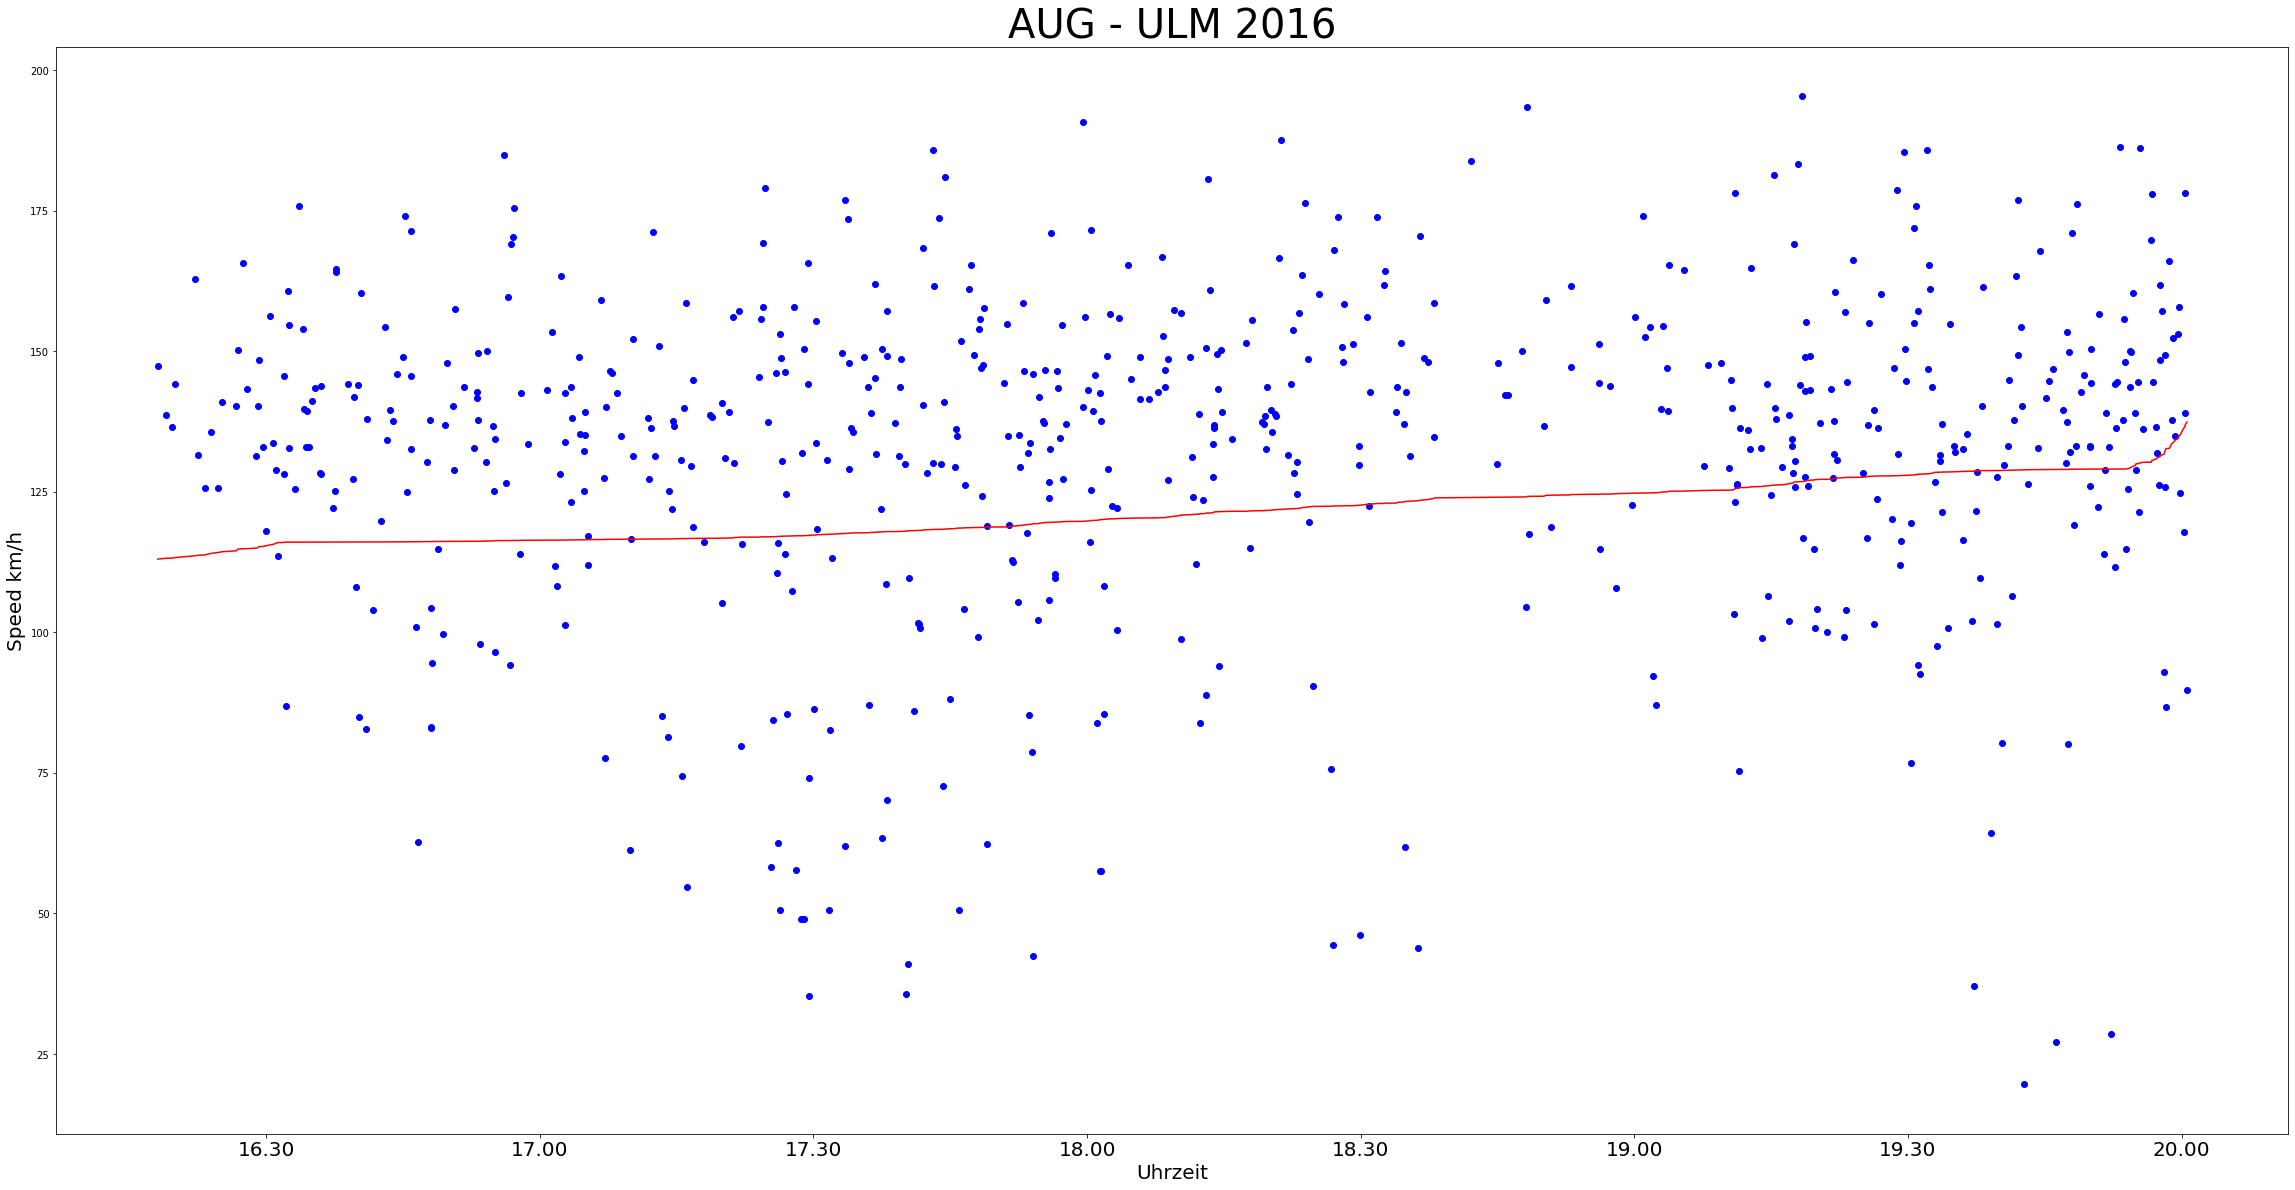

In [78]:
y = np.array([(57.2/s)*3600 for s in y])
y_pred = np.array([(57.2/s)*3600 for s in y_pred])

fig, ax = plt.subplots(figsize=(40,20))
ax.set_xticklabels(['16.00', '16.30', '17.00', '17.30', '18.00', '18.30', '19.00', '19.30', '20.00'], fontsize=20)
plt.scatter(x, y, color="blue")
plt.title('AUG - ULM 2016', fontsize=40)
plt.xlabel('Uhrzeit', fontsize=20)
plt.ylabel('Speed km/h', fontsize=20)
plt.plot(np.unique(x), np.unique(y_pred), color="red")